falta ajustar os textos, incluir insights e resumo executivo inicial além do README do proojet completo com questao 1 e 2

# Desafio Data Science - Meli

Autor: Lucas Porto

## Explore ofertas relámpago. Que insights você pode gerar?

### Descrição
Em conjunto com o desafio compartilhamos um arquivo chamado "relampago_relampago.csv" que contém informações sobre os resultados de ofertas do tipo relâmpago para um período de tempo e um país específico.

Ou seja, são ofertas que têm duração definida de algumas horas e um percentual de unidades (estoque) comprometidas.
O objetivo deste desafio é fazer uma EDA sobre estes dados procurando insights sobre este tipo de ofertas.
As colunas do conjunto de dados são autoexplicativas, mas você pode nos fazer qualquer pergunta.

### Entregável 
O resultado deste desafio é um notebook Jupyter com EDA.

# Imports

In [1]:
import pandas as pd
import numpy as np


In [2]:
from utils.analytics_utils import (
    carregar_dados,
    criar_features,
    obter_colunas_por_tipo,
    analise_outliers,
    analise_distribuicoes_graficos,
    analise_boxplots_graficos,
    grafico_correlacao_numericas,
    exibir_pares_correlacionados,
    analise_completa_por_vertical,
    analise_temporal_por_vertical,
    analisar_categoria_performance,
    graficos_distribuicao_categoricas,
    analise_evolutiva_temporal,
    analise_correlacoes_heatmaps,
    analise_duracao_receita,
    analise_data_quality,
    analise_tempo_ate_esgotar,
    analise_pareto_gmv,
    comparacao_frete_controlada,
    kpi_resumo,
    kpi_resumo_2d,
)

# Carregar os Dados

In [3]:
df = carregar_dados("data/ofertas_relampago.csv")

Carregando dados...
Dados carregados com sucesso! Shape: (48746, 13)


# EDA

## Entendendo os dados

In [4]:
print(f"\nDimensões do dataset:")
print(f"   - Linhas: {df.shape[0]:,}")
print(f"   - Colunas: {df.shape[1]}")

print(f"\nColunas disponíveis:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i:2d}. {col}")


Dimensões do dataset:
   - Linhas: 48,746
   - Colunas: 13

Colunas disponíveis:
    1. OFFER_START_DATE
    2. OFFER_START_DTTM
    3. OFFER_FINISH_DTTM
    4. OFFER_TYPE
    5. INVOLVED_STOCK
    6. REMAINING_STOCK_AFTER_END
    7. SOLD_AMOUNT
    8. SOLD_QUANTITY
    9. ORIGIN
   10. SHIPPING_PAYMENT_TYPE
   11. DOM_DOMAIN_AGG1
   12. VERTICAL
   13. DOMAIN_ID


In [5]:
# Primeiras linhas
print(f"\nPrimeiras 5 linhas:")
df.head()


Primeiras 5 linhas:


,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES


In [6]:
# Informacoes sobre tipos de dados
print(f"\nInformações sobre tipos de dados:")
print(df.dtypes)


Informações sobre tipos de dados:
OFFER_START_DATE              object
OFFER_START_DTTM              object
OFFER_FINISH_DTTM             object
OFFER_TYPE                    object
INVOLVED_STOCK                 int64
REMAINING_STOCK_AFTER_END      int64
SOLD_AMOUNT                  float64
SOLD_QUANTITY                float64
ORIGIN                        object
SHIPPING_PAYMENT_TYPE         object
DOM_DOMAIN_AGG1               object
VERTICAL                      object
DOMAIN_ID                     object
dtype: object


In [7]:
 # Estatísticas descritivas
print(f"\Estatísticas descritivas:")
df.describe(include='all')

\Estatísticas descritivas:


,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
count,48746,48746,48746,48746,48746.000000,48746.000000,24579.000000,24579.000000,11316,48746,48746,48746,48746
unique,61,783,7578,1,NaN,NaN,NaN,NaN,1,2,36,9,1266
top,2021-07-30,2021-07-30 13:00:00+00:00,2021-07-06 13:00:01+00:00,lightning_deal,NaN,NaN,NaN,NaN,A,free_shipping,HOME&DECOR,APP & SPORTS,MLM-SURGICAL_AND_INDUSTRIAL_MASKS
freq,1300,414,77,48746,NaN,NaN,NaN,NaN,11316,26658,6742,13241,1759
mean,NaN,NaN,NaN,NaN,35.007508,30.565216,51.208898,10.851052,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,206.761058,195.813806,175.254414,45.475305,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,-192.000000,0.280000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,5.000000,4.000000,5.730000,1.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,10.000000,8.000000,12.420000,3.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,15.000000,15.000000,30.925000,6.000000,NaN,NaN,NaN,NaN,NaN


Podemos já começar a conhecer nosso dataframe:

- OFFER_START_DATE: object -> Data da oferta: mudar para tipo data
- OFFER_START_DTTM: object -> Data com hora e minuto do início da oferta: mudar para tipo datetime com timestamp
- OFFER_FINISH_DTTM: object -> Data com hora e minuto do final da oferta: mudar para tipo datetime com timestamp
- OFFER_TYPE: object -> Tipo da Oferta
- INVOLVED_STOCK: int64 -> Estoque disponível para a oferta
- REMAINING_STOCK_AFTER_END: int64 -> Estoque após a oferta: pode ser negativo, já que a quantidade vendida pode acabar sendo maior que a existente (provavelmente gere custos)
- SOLD_AMOUNT: float64 -> Quantidade vendida monetariamente
- SOLD_QUANTITY: float64 -> Quantidade vendia em unidades
- ORIGIN: object -> Não entendi esta coluna 100%
- SHIPPING_PAYMENT_TYPE: object -> Frete Grátis ou não
- DOM_DOMAIN_AGG1: object -> Área do produto
- VERTICAL      : object -> Departamento
- DOMAIN_ID: object -> Id da área de produto

## Conversão de Tipos de Dados e Limpeza


## Verificação dos nulos

In [8]:
# Contagem de nulos por coluna
nulos_por_coluna = df.isnull().sum()
percentual_nulos = (nulos_por_coluna / len(df)) * 100

print(f"Valores nulos por coluna:")
df_nulos = pd.DataFrame({
    'Coluna': nulos_por_coluna.index,
    'Quantidade_Nulos': nulos_por_coluna.values,
    'Percentual_Nulos': percentual_nulos.values
}).sort_values('Quantidade_Nulos', ascending=False)

df_nulos

Valores nulos por coluna:


,Coluna,Quantidade_Nulos,Percentual_Nulos
8,ORIGIN,37430,76.785788
6,SOLD_AMOUNT,24167,49.577401
7,SOLD_QUANTITY,24167,49.577401
1,OFFER_START_DTTM,0,0.000000
0,OFFER_START_DATE,0,0.000000
4,INVOLVED_STOCK,0,0.000000
3,OFFER_TYPE,0,0.000000
2,OFFER_FINISH_DTTM,0,0.000000
5,REMAINING_STOCK_AFTER_END,0,0.000000
9,SHIPPING_PAYMENT_TYPE,0,0.000000


Podemos ver que temos 3 colunas com valores nulos:
- Origin: quase incompleta
- SOLD_AMOUT e SOLD_QUANTITY: quase metade dos dados faltantes, o que pode apontar que nem todos os produtos venderam durante a oferta.

In [9]:
print(f"Padrões de valores faltantes:")
missing_patterns = df.isnull().sum(axis=1)
print(f"   - Linhas sem nulos: {(missing_patterns == 0).sum():,}")
print(f"   - Linhas com 1 nulo: {(missing_patterns == 1).sum():,}")
print(f"   - Linhas com 2 nulo: {(missing_patterns == 2).sum():,}")
print(f"   - Linhas com 3 nulo: {(missing_patterns == 3).sum():,}")

Padrões de valores faltantes:
   - Linhas sem nulos: 5,208
   - Linhas com 1 nulo: 19,371
   - Linhas com 2 nulo: 6,108
   - Linhas com 3 nulo: 18,059


## Ajuste dos tipos de dados

In [10]:
df_tratado = criar_features(df)


## Ajuste dos tipos de dados
   Encontrados 1,273 valores negativos em REMAINING_STOCK_AFTER_END
   Estes valores indicam overselling (vendas além do estoque disponível)

## Criando features temporais

## Criando features de vendas

## Criando features de preço

## Criando features de potencial

## Criando features de overselling

## Criando KPIs de qualidade e consistência

Feature engineering completo!
   Total de features criadas: 22


In [11]:
colunas = obter_colunas_por_tipo()


## Análises Estatísticas

In [12]:
print(f"\nEstatisticas descritivas:")
df_tratado[colunas['todas_numericas']].describe()


Estatisticas descritivas:


,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,DURATION_HOURS,START_HOUR,WEEKDAY,WEEKEND,STOCK_SOLD,SALES_RATE,...,POTENTIAL_VALUE,SALES_EFFICIENCY,OVERSELLING_MARGIN,OVERSELL_FLAG,OVERSELL_UNITS,STOCKOUT_FLAG,STOCK_SOLD_calc,SOLD_UNITS_MISMATCH,SELL_THROUGH,GMV_PER_STOCK
count,48746.000000,48746.000000,24579.000000,24579.000000,48746.000000,48746.000000,48746.000000,48746.000000,48746.000000,48746.000000,...,48746.000000,48746.000000,48746.000000,48746.000000,48746.000000,48746.000000,48746.000000,24579.000000,48746.000000,24579.000000
mean,35.007508,30.565216,51.208898,10.851052,5.708344,13.178722,3.000082,0.273663,4.442293,0.206735,...,216.468757,0.206735,0.078304,0.026115,0.078304,0.087433,4.442293,2.521746,0.211204,2.667905
std,206.761058,195.813806,175.254414,45.475305,2.113096,4.511976,1.937965,0.445843,24.212081,0.353204,...,1916.282791,0.353204,1.250329,0.159479,1.250329,0.282471,24.212081,24.604901,0.357883,7.083581
min,1.000000,-192.000000,0.280000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000840
25%,5.000000,4.000000,5.730000,1.000000,6.000000,7.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.484667
50%,10.000000,8.000000,12.420000,3.000000,6.000556,13.000000,3.000000,0.000000,1.000000,0.010000,...,3.950000,0.010000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.020000,1.179333
75%,15.000000,15.000000,30.925000,6.000000,6.004444,19.000000,5.000000,1.000000,3.000000,0.250000,...,44.965625,0.250000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.266667,2.657333
max,9000.000000,8635.000000,4836.570000,1646.000000,104.752500,23.000000,6.000000,1.000000,1642.000000,13.800000,...,127298.805970,13.800000,192.000000,1.000000,192.000000,1.000000,1642.000000,752.000000,15.000000,220.890000


In [13]:
analise_outliers(df_tratado, colunas['todas_numericas'])

=== OUTLIERS ===
+---------------------------+--------------+-------------------+
| Variável                  |   Quantidade |   Porcentagem (%) |
+===========================+==============+===================+
| INVOLVED_STOCK            |         4445 |              9.12 |
+---------------------------+--------------+-------------------+
| REMAINING_STOCK_AFTER_END |         4154 |              8.52 |
+---------------------------+--------------+-------------------+
| SOLD_AMOUNT               |         2953 |              6.06 |
+---------------------------+--------------+-------------------+
| SOLD_QUANTITY             |         2897 |              5.94 |
+---------------------------+--------------+-------------------+
| DURATION_HOURS            |        19547 |             40.10 |
+---------------------------+--------------+-------------------+
| START_HOUR                |            0 |              0.00 |
+---------------------------+--------------+-------------------+
| WEEKDA

#### Análise de Distribuições

GRÁFICOS - DISTRIBUIÇÃO DAS VARIÁVEIS NUMÉRICAS
(Escala Logarítmica - Transformação: LOG)



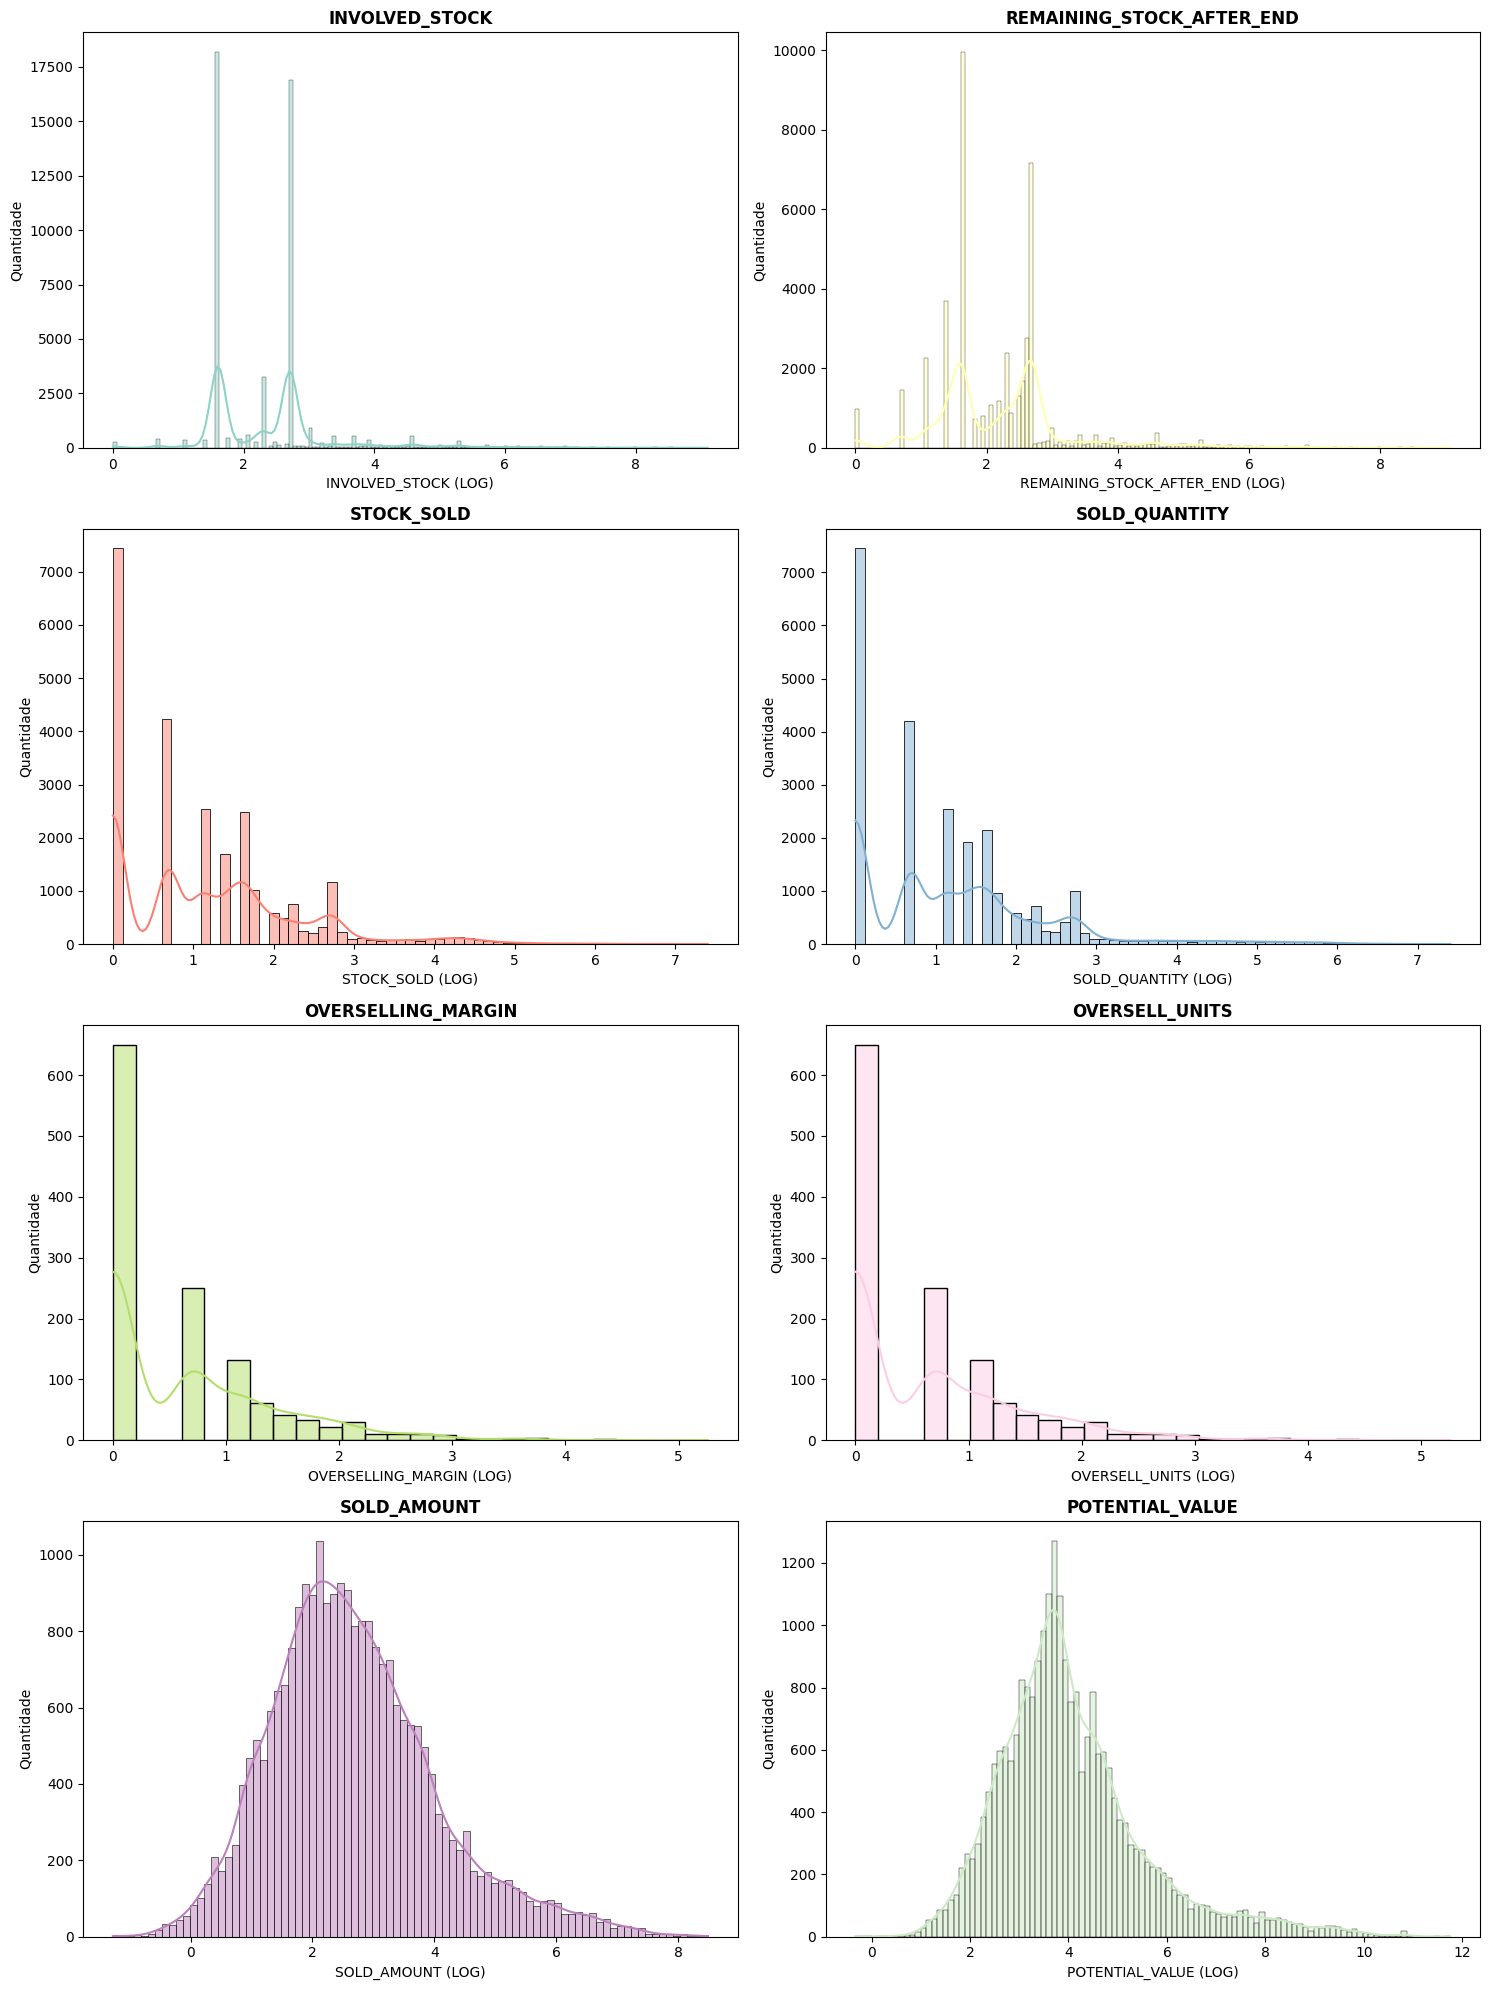

In [14]:
analise_distribuicoes_graficos(df_tratado, colunas['viz_quantidades'], log_scale=True, log_transform="log", plot_type='both')

GRÁFICOS - DISTRIBUIÇÃO DAS VARIÁVEIS NUMÉRICAS
(Escala Logarítmica - Transformação: LOG1P)



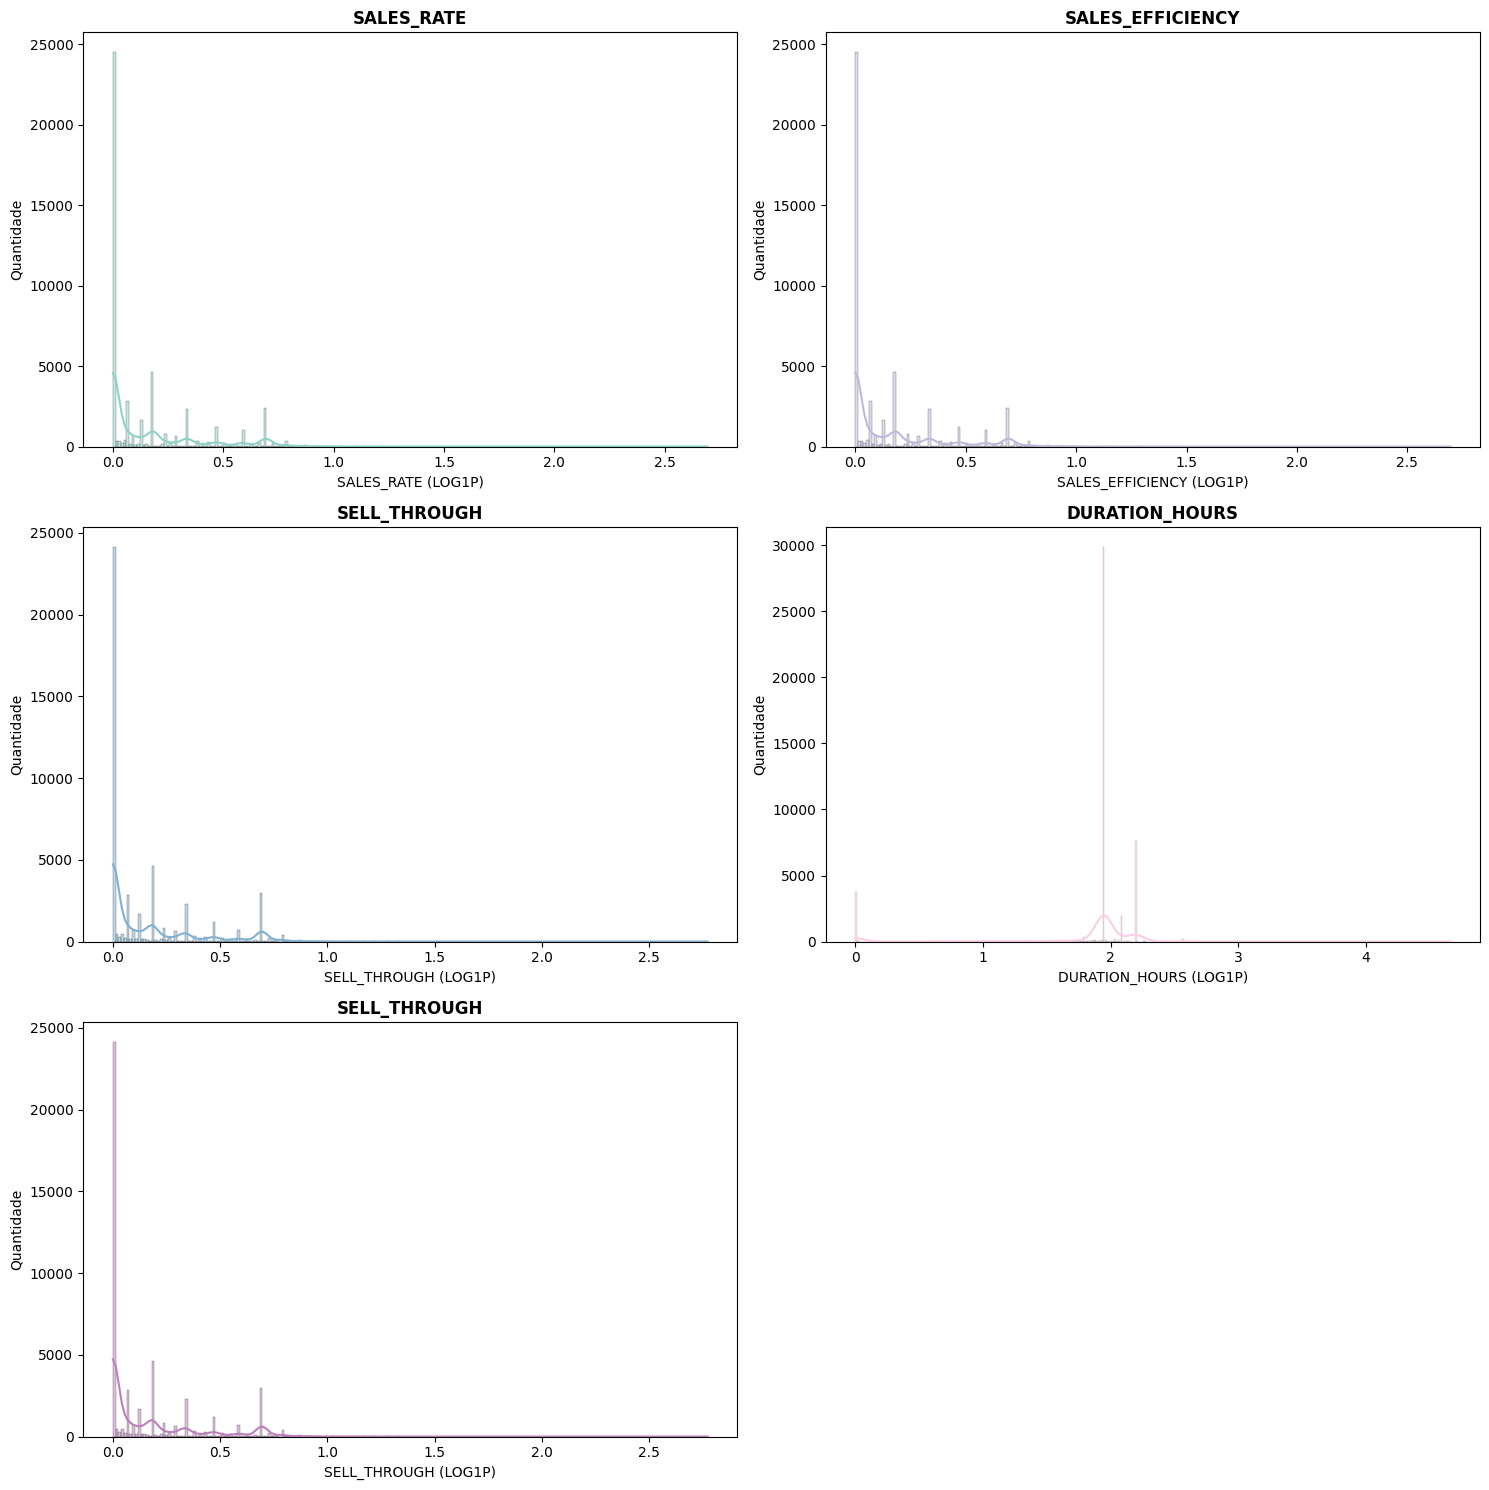

In [15]:
analise_distribuicoes_graficos(df_tratado, colunas['viz_taxas'], log_scale=True, log_transform="log1p", plot_type='both')

GRÁFICOS - DISTRIBUIÇÃO DAS VARIÁVEIS NUMÉRICAS
(Escala Logarítmica - Transformação: LOG1P)



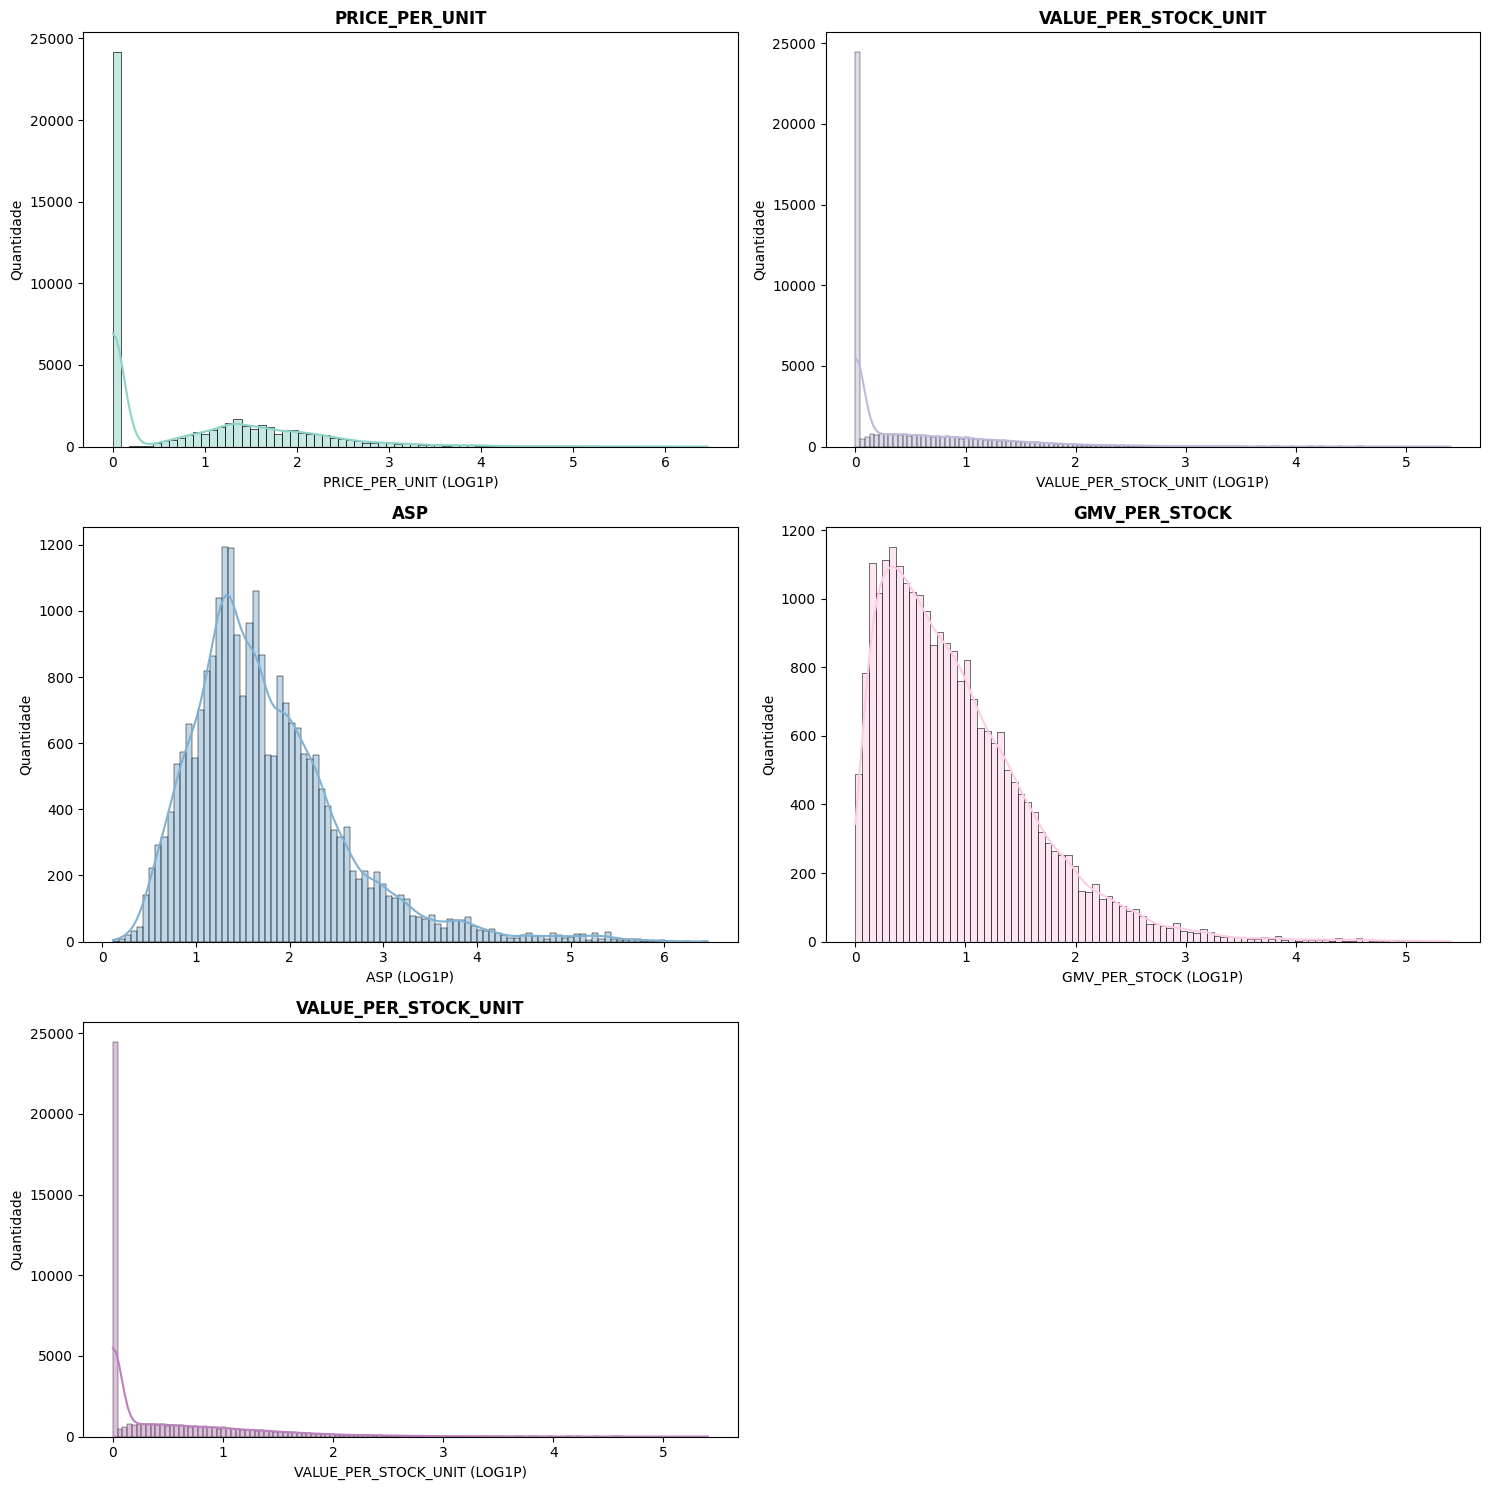

In [16]:
analise_distribuicoes_graficos(df_tratado, colunas['viz_precos'], log_scale=True, log_transform="log1p", plot_type='both')

#### Boxplots

GRÁFICOS - BOXPLOT DAS VARIÁVEIS NUMÉRICAS


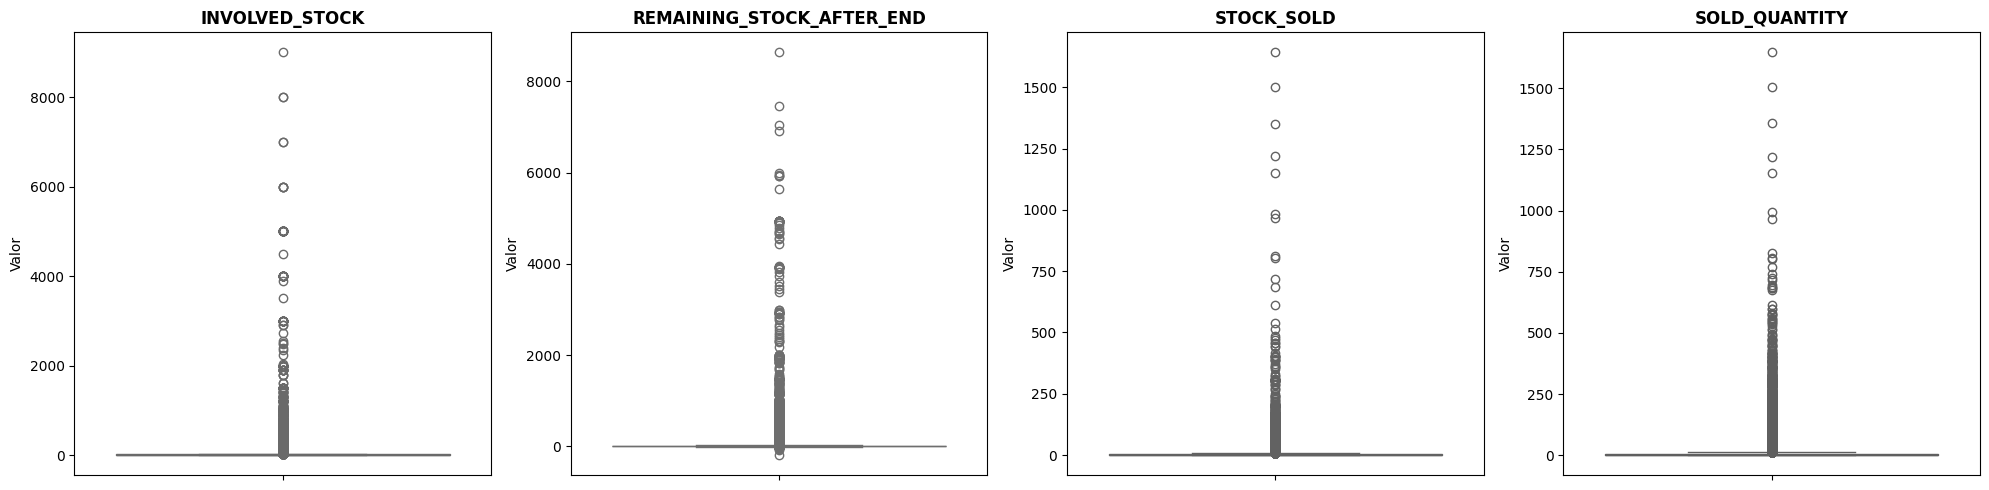

In [17]:
analise_boxplots_graficos(df_tratado, colunas['box_quantidades'])

GRÁFICOS - BOXPLOT DAS VARIÁVEIS NUMÉRICAS


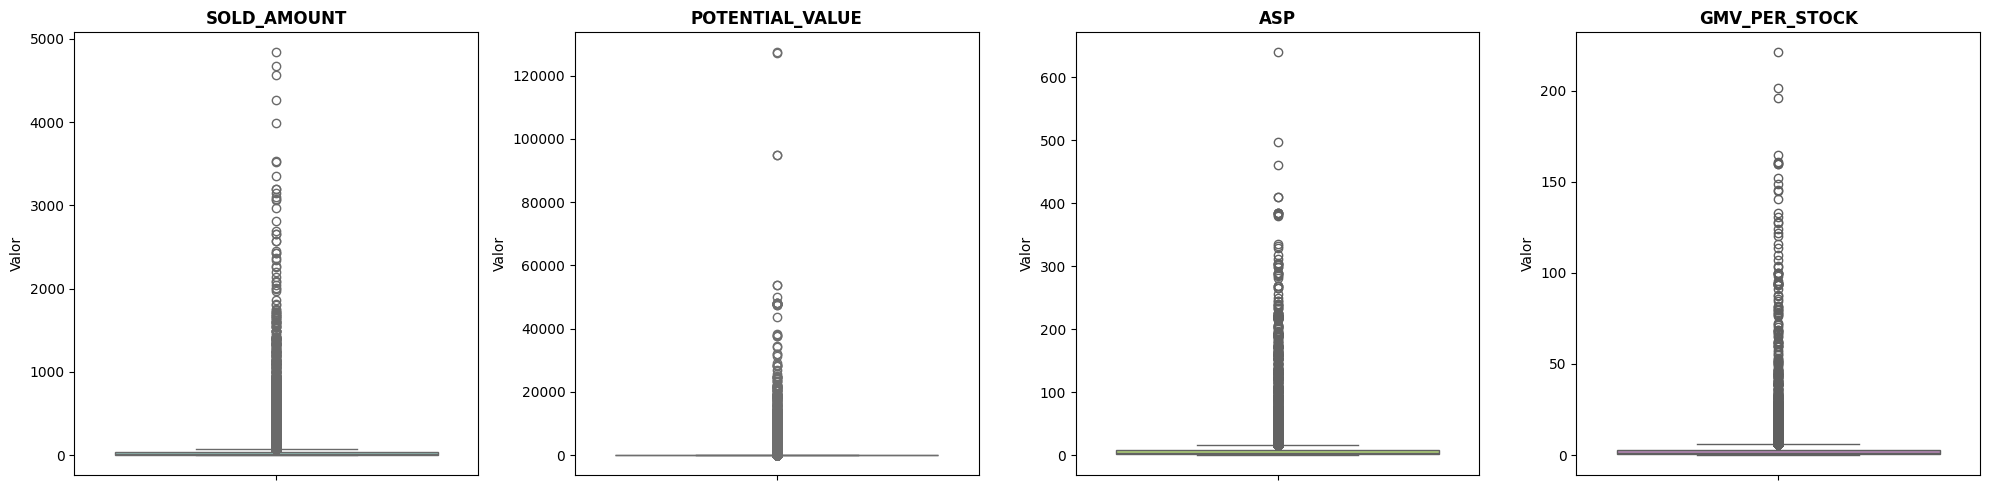

In [18]:
analise_boxplots_graficos(df_tratado, colunas['box_valores'])

GRÁFICOS - BOXPLOT DAS VARIÁVEIS NUMÉRICAS


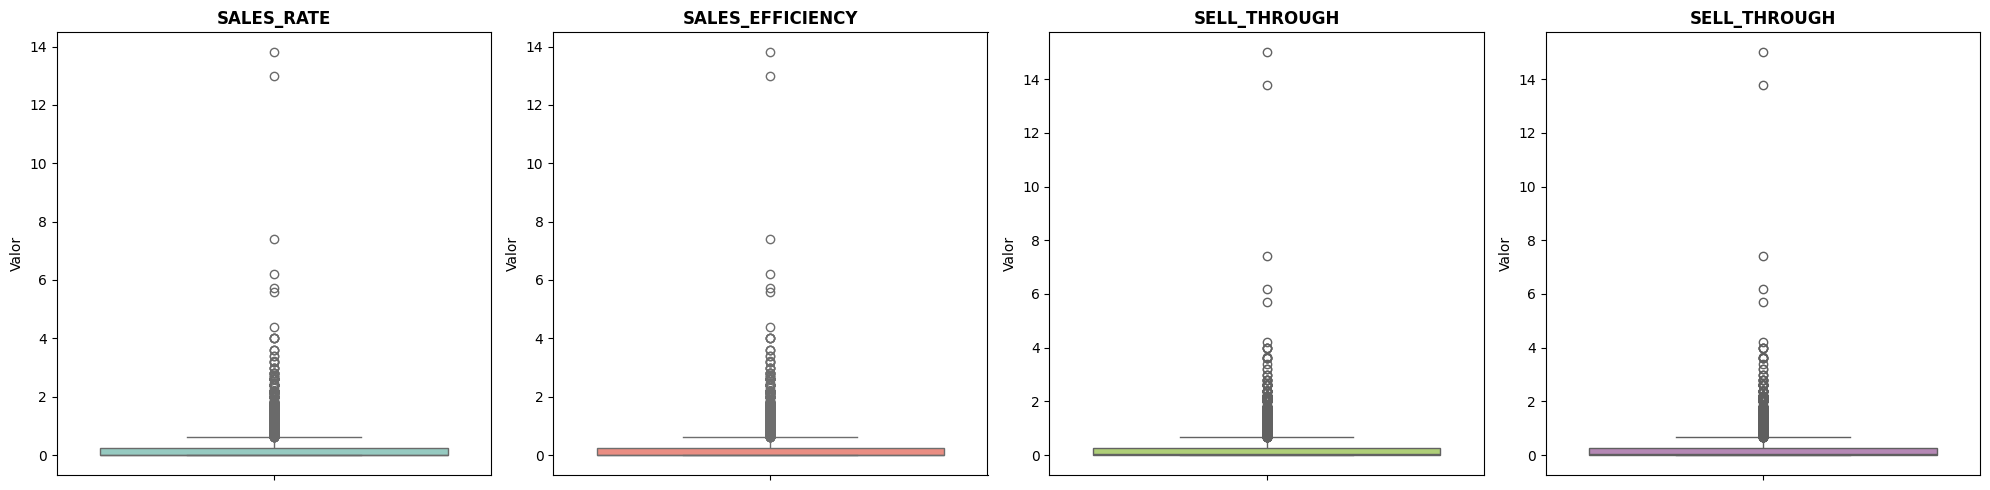

In [19]:
analise_boxplots_graficos(df_tratado, colunas['box_taxas'])

### Correlações Numéricas

GRÁFICO - MATRIX DE CORRELAÇÃO DAS VARIÁVEIS NUMÉRICAS


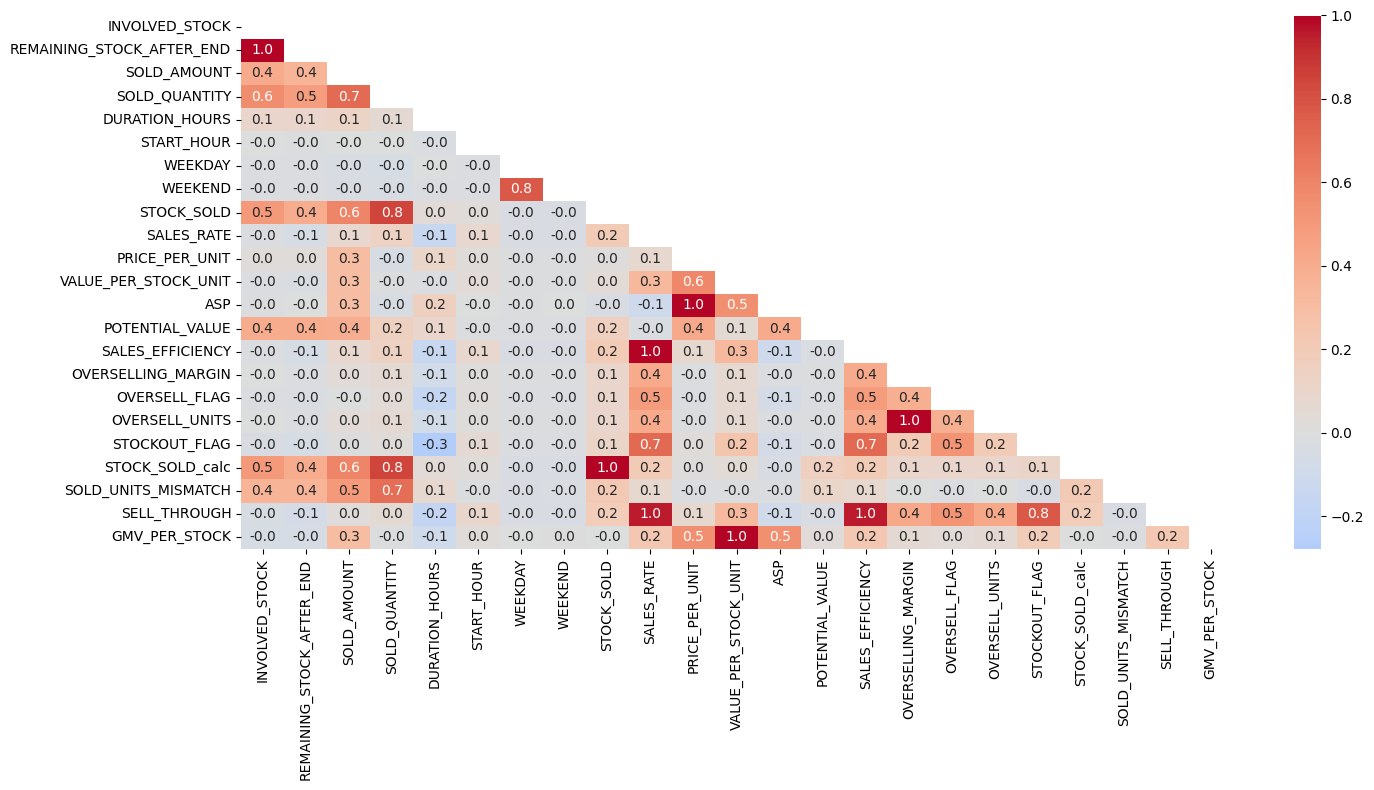

In [20]:
grafico_correlacao_numericas(df_tratado, colunas['todas_numericas'])

Podemos perceber que temos alta correlação, nas variáveis existentes no dataframe original:
- REMAINING_STOCK_AFTER_END e INVOLVED_STOCK 
- STOCK_SOLD e SOLD_QUANTITY

In [21]:
_ = exibir_pares_correlacionados(df_tratado, colunas['todas_numericas'], threshold=0.8)


PARES DE VARIÁVEIS ALTAMENTE CORRELACIONADAS (|r| >= 0.8)

Total de pares encontrados: 10

--------------------------------------------------------------------------------
POR TIPO DE RELAÇÃO:
--------------------------------------------------------------------------------
   - Criada × Criada: 7 pares
   - Original × Original: 1 pares
   - Original × Criada: 2 pares

--------------------------------------------------------------------------------
TOP 10 CORRELAÇÕES MAIS FORTES:
--------------------------------------------------------------------------------

5. SALES_RATE x SALES_EFFICIENCY
   Correlação: +1.000
   Vendas (Criada) x Potencial (Criada)

4. STOCK_SOLD x STOCK_SOLD_calc
   Correlação: +1.000
   Vendas (Criada) x Qualidade (Criada)

10. OVERSELLING_MARGIN x OVERSELL_UNITS
   Correlação: +1.000
   Overselling (Criada) x Overselling (Criada)

7. PRICE_PER_UNIT x ASP
   Correlação: +1.000
   Preço (Criada) x Preço (Criada)

8. VALUE_PER_STOCK_UNIT x GMV_PER_STOCK
   Correla

### Análise Distribuição Categóricas

GRÁFICOS - DISTRIBUIÇÃO DAS VARIÁVEIS CATEGÓRICAS


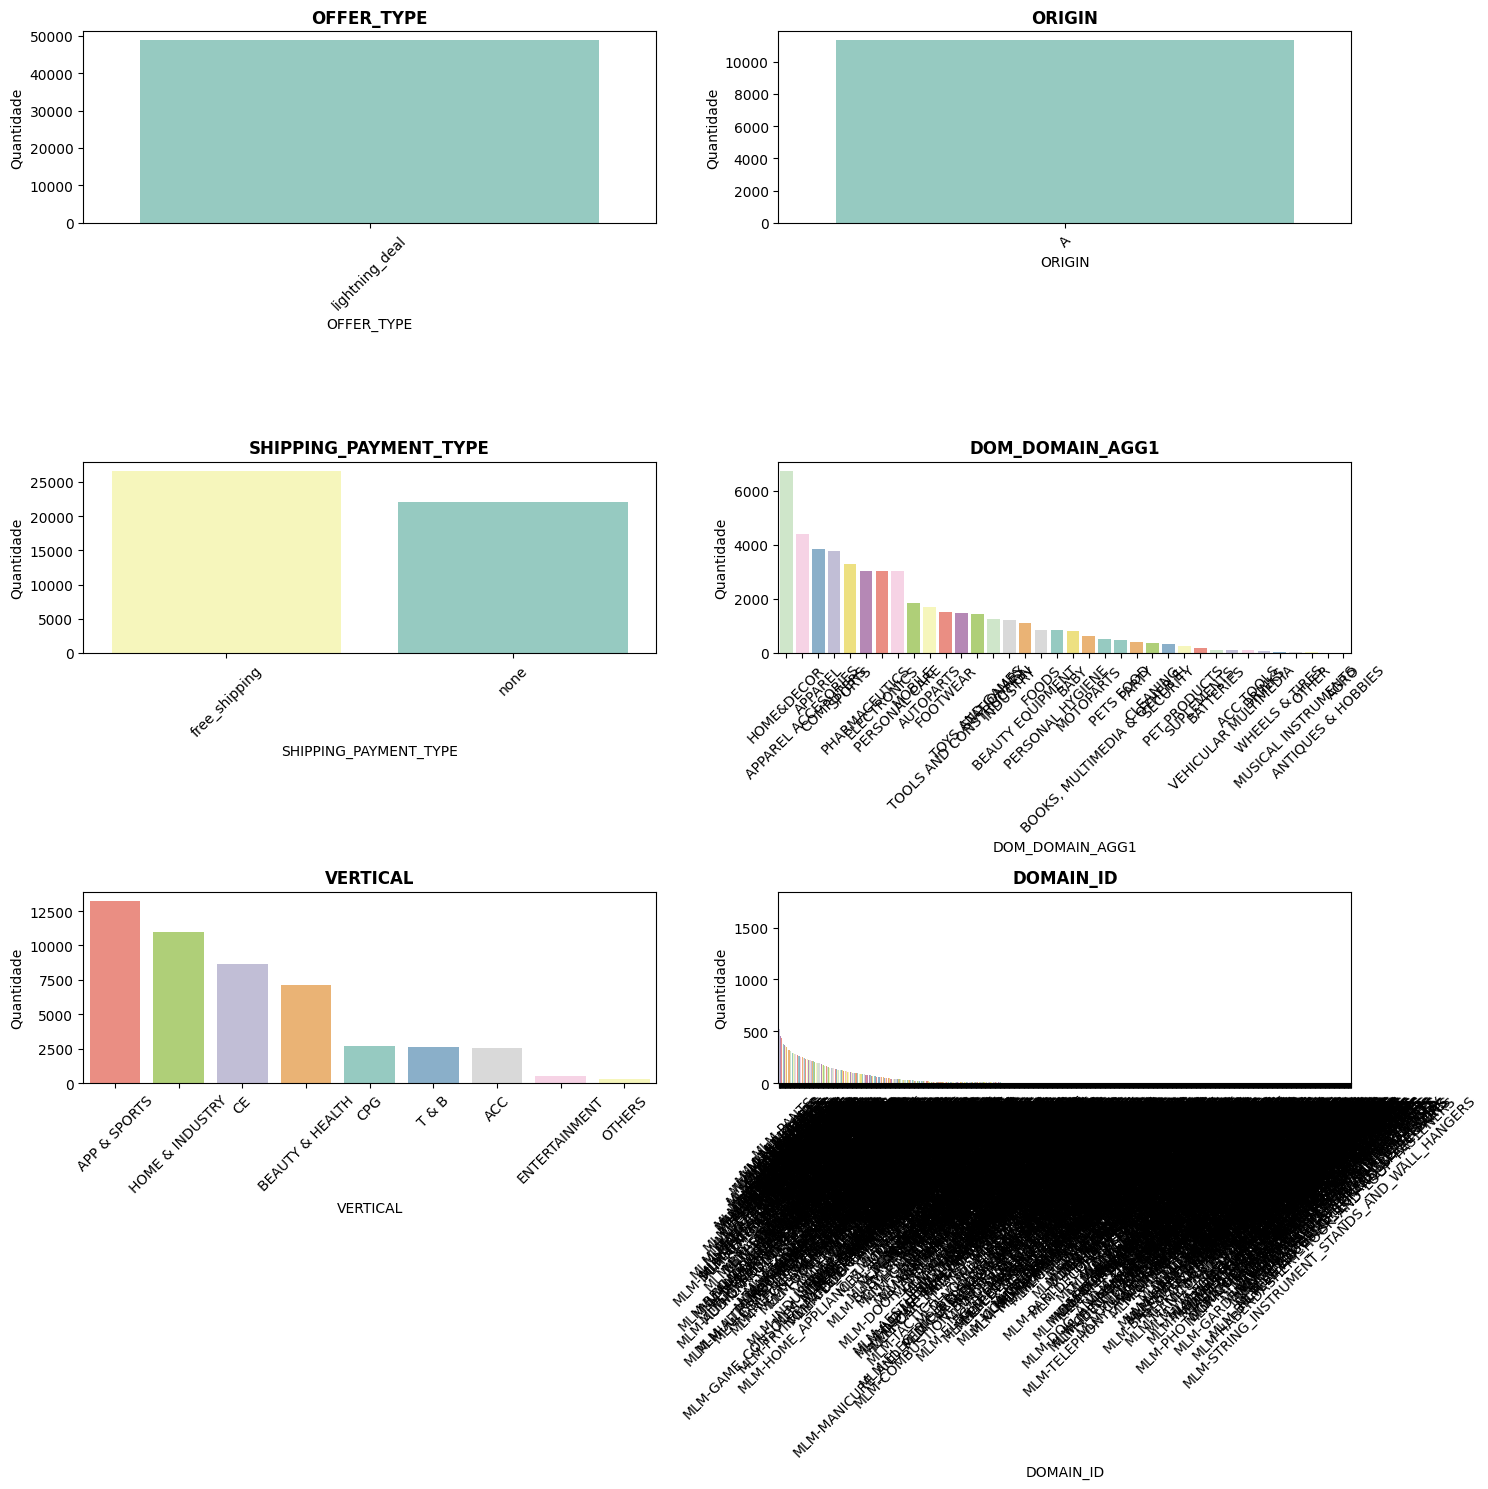

In [22]:
graficos_distribuicao_categoricas(df_tratado, colunas['categoricas'])

# Começar a investigar as ofertas

In [23]:
total_ofertas = len(df_tratado)
print(f"Total de ofertas analisadas: {total_ofertas:,}")

periodo_inicio = df_tratado['OFFER_START_DATE'].min()
periodo_fim = df_tratado['OFFER_START_DATE'].max()
print(f"Período analisado: {periodo_inicio} a {periodo_fim}")

categorias = df_tratado['PERFORMANCE_CATEGORY'].value_counts()
taxa_media = df_tratado['SALES_RATE'].mean()

print(f"Taxa média de venda: {taxa_media:.2%}")
print(f"Ofertas esgotadas: {categorias['Esgotada']:,} ({categorias['Esgotada']/total_ofertas*100:.1f}%)")
print(f"Ofertas não esgotadas: {categorias['Venda_Parcial']:,} ({categorias['Venda_Parcial']/total_ofertas*100:.1f}%)")
print(f"Ofertas não vendidas: {categorias['Não_Vendida']:,} ({categorias['Não_Vendida']/total_ofertas*100:.1f}%)")

Total de ofertas analisadas: 48,746
Período analisado: 2021-06-01 00:00:00 a 2021-07-31 00:00:00
Taxa média de venda: 20.67%
Ofertas esgotadas: 3,651 (7.5%)
Ofertas não esgotadas: 20,928 (42.9%)
Ofertas não vendidas: 24,167 (49.6%)


## Ofertas que não venderam

ANÁLISE DE OFERTAS: NÃO_VENDIDA
Total de ofertas não_vendida: 24,167
Percentual do total: 49.6%
Todas as ofertas têm SALES_RATE = 0

Top 10 ofertas não_vendida:
       VERTICAL DOM_DOMAIN_AGG1  INVOLVED_STOCK  STOCK_SOLD  SALES_RATE  SOLD_AMOUNT
         OTHERS    PET PRODUCTS               5           0         0.0          NaN
             CE       COMPUTERS              23           0         0.0          NaN
             CE       COMPUTERS              10           0         0.0          NaN
             CE       COMPUTERS              10          11         0.0          NaN
             CE     ELECTRONICS              15           0         0.0          NaN
            CPG       PETS FOOD               6           0         0.0          NaN
   APP & SPORTS         APPAREL               5           0         0.0          NaN
          T & B           PARTY              10           0         0.0          NaN
BEAUTY & HEALTH   PERSONAL CARE              30           0         0.0   

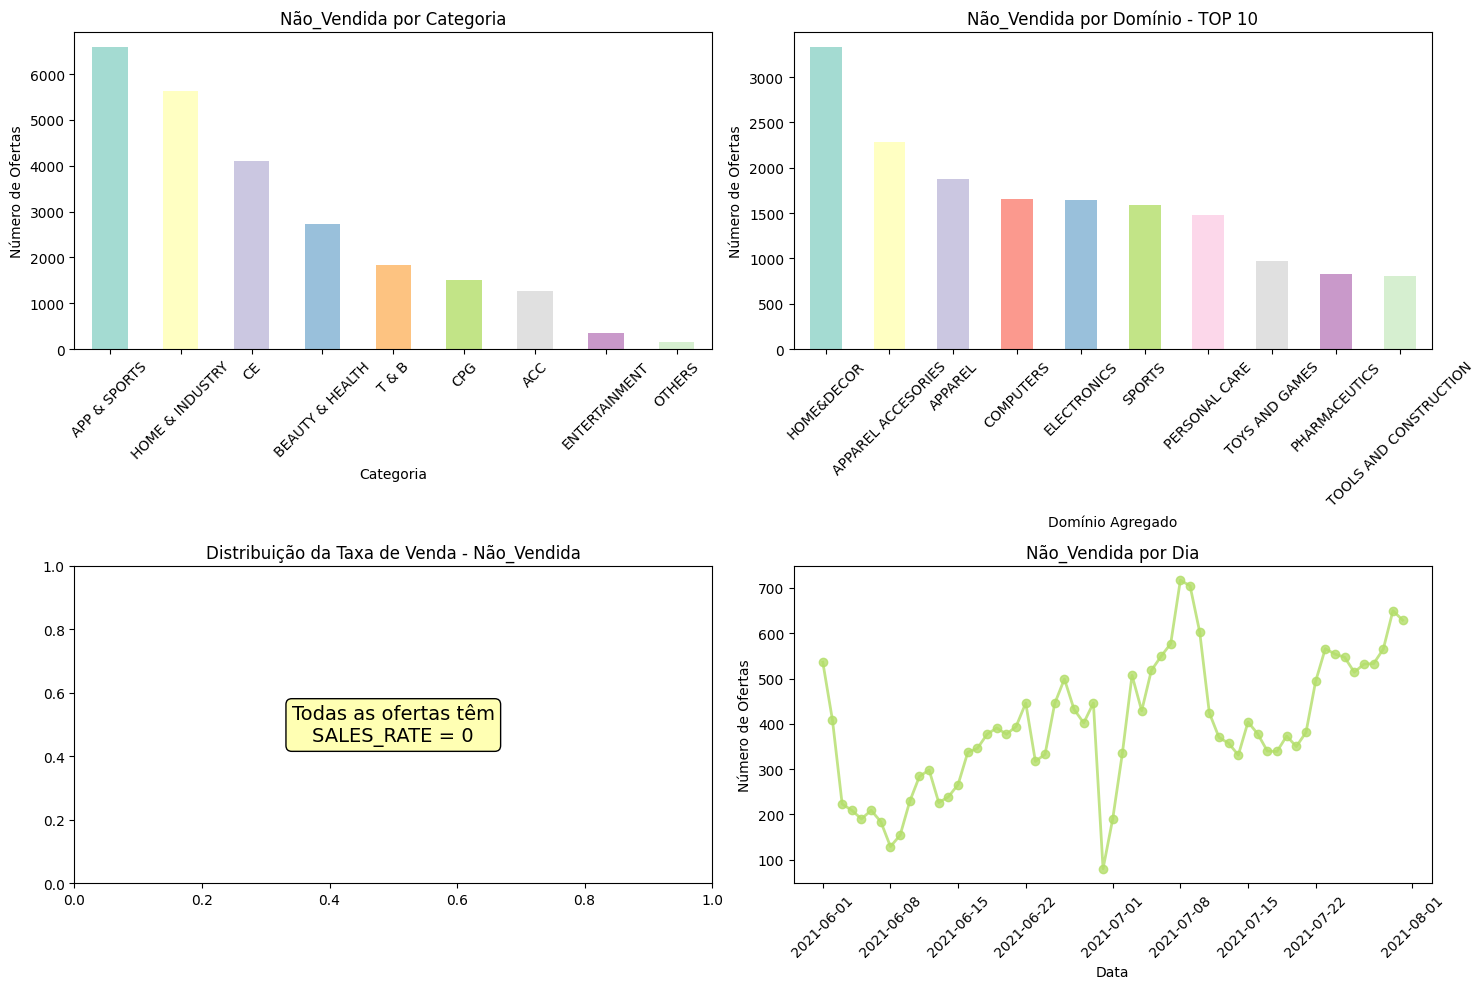


Resumo por Vertical:
                 Quantidade  Taxa_Media  Receita_Total
VERTICAL                                              
APP & SPORTS           6592         0.0            0.0
HOME & INDUSTRY        5632         0.0            0.0
CE                     4100         0.0            0.0
BEAUTY & HEALTH        2722         0.0            0.0
T & B                  1843         0.0            0.0
CPG                    1507         0.0            0.0
ACC                    1264         0.0            0.0
ENTERTAINMENT           347         0.0            0.0
OTHERS                  160         0.0            0.0


In [24]:
_ = analisar_categoria_performance(df_tratado, 'Não_Vendida')

## Ofertas que venderam até o fim do estoque

ANÁLISE DE OFERTAS: VENDA_PARCIAL
Total de ofertas venda_parcial: 20,928
Percentual do total: 42.9%
Taxa média de venda: 28.47%

Top 10 ofertas venda_parcial:
       VERTICAL  DOM_DOMAIN_AGG1  INVOLVED_STOCK  STOCK_SOLD  SALES_RATE  SOLD_AMOUNT
BEAUTY & HEALTH    PHARMACEUTICS             810         811    0.997531      2255.46
HOME & INDUSTRY         INDUSTRY             250         250    0.996000       788.24
BEAUTY & HEALTH    PHARMACEUTICS             400         404    0.995000       671.36
BEAUTY & HEALTH    PHARMACEUTICS             240         240    0.991667       887.73
             CE      ELECTRONICS             100          97    0.990000      2202.59
BEAUTY & HEALTH BEAUTY EQUIPMENT             100         103    0.990000       428.16
BEAUTY & HEALTH    PHARMACEUTICS              42          42    0.976190       732.39
   APP & SPORTS           SPORTS              40          41    0.975000        49.81
HOME & INDUSTRY       HOME&DECOR              40          40    0.9

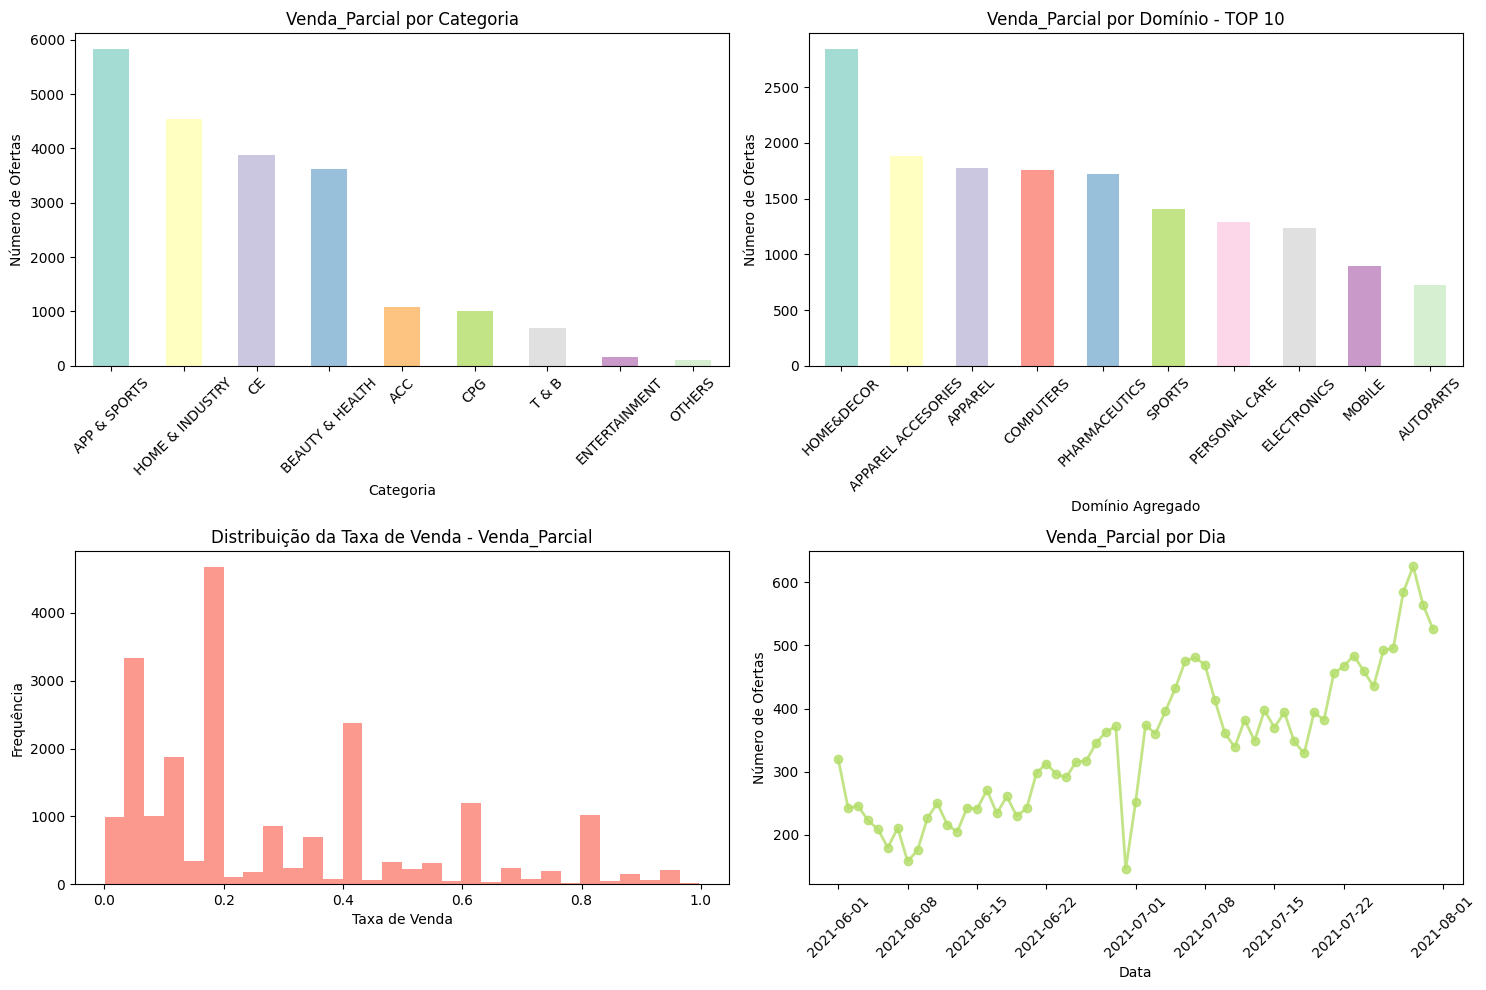


Resumo por Vertical:
                 Quantidade  Taxa_Media  Receita_Total
VERTICAL                                              
APP & SPORTS           5838        0.28      107775.07
HOME & INDUSTRY        4545        0.28      115704.99
CE                     3885        0.27      312117.02
BEAUTY & HEALTH        3616        0.30      418961.18
ACC                    1076        0.32       18889.27
CPG                     999        0.29       12404.04
T & B                   698        0.24       12394.52
ENTERTAINMENT           161        0.29        1571.22
OTHERS                  110        0.29        1668.76


In [25]:
_ = analisar_categoria_performance(df_tratado, 'Venda_Parcial')

## Ofertas que Venderam acima do Estoque

ANÁLISE DE OFERTAS: ESGOTADA
Total de ofertas esgotada: 3,651
Percentual do total: 7.5%
Taxa média de venda: 112.82%
Ofertas com overselling: 1,239 (33.9%)

Top 10 ofertas esgotada:
       VERTICAL    DOM_DOMAIN_AGG1  INVOLVED_STOCK  STOCK_SOLD  SALES_RATE  SOLD_AMOUNT
             CE          COMPUTERS              15         207   13.800000       893.26
          T & B     TOYS AND GAMES               5          75   13.000000        60.86
   APP & SPORTS             SPORTS               5          37    7.400000       127.61
   APP & SPORTS             SPORTS               5          31    6.200000        99.12
            CPG          PETS FOOD               7          40    5.714286        19.36
   APP & SPORTS            APPAREL               5          18    5.600000        62.78
   APP & SPORTS APPAREL ACCESORIES               5           2    4.400000        13.66
HOME & INDUSTRY         HOME&DECOR               5          20    4.000000        84.52
   APP & SPORTS           

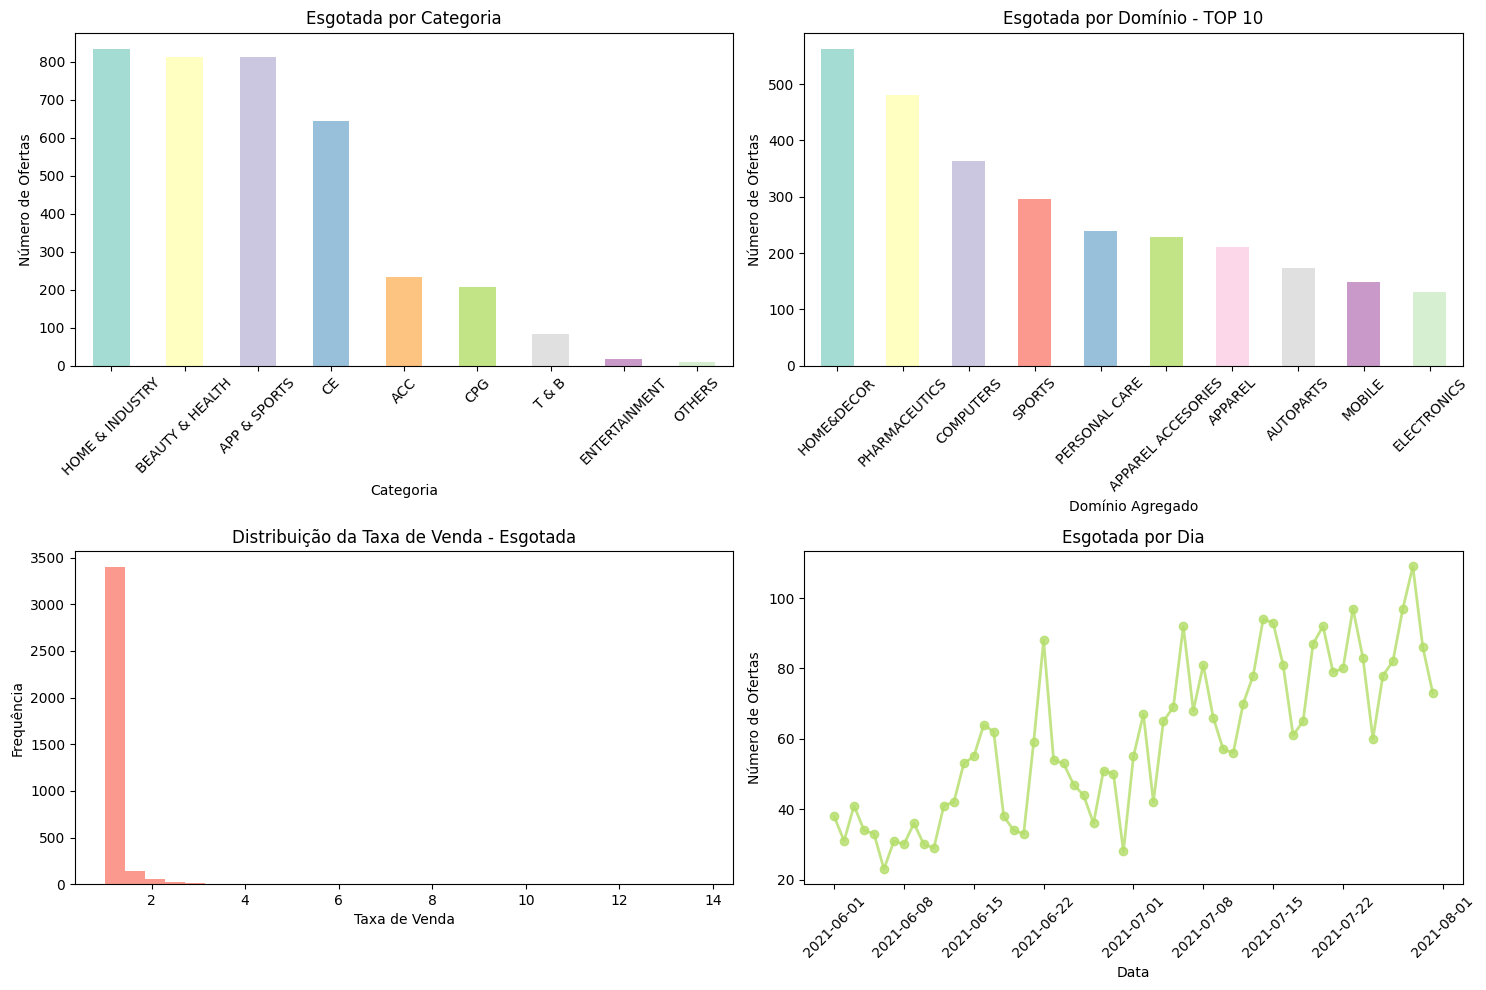


Resumo por Vertical:
                 Quantidade  Taxa_Media  Receita_Total
VERTICAL                                              
HOME & INDUSTRY         834        1.13       39813.69
BEAUTY & HEALTH         812        1.14      128466.09
APP & SPORTS            811        1.11       23326.29
CE                      644        1.10       50670.92
ACC                     233        1.13        7930.71
CPG                     208        1.17        4383.64
T & B                    83        1.40        1908.26
ENTERTAINMENT            17        1.00         417.35
OTHERS                    9        1.10         260.48


In [26]:
_ = analisar_categoria_performance(df_tratado, 'Esgotada')

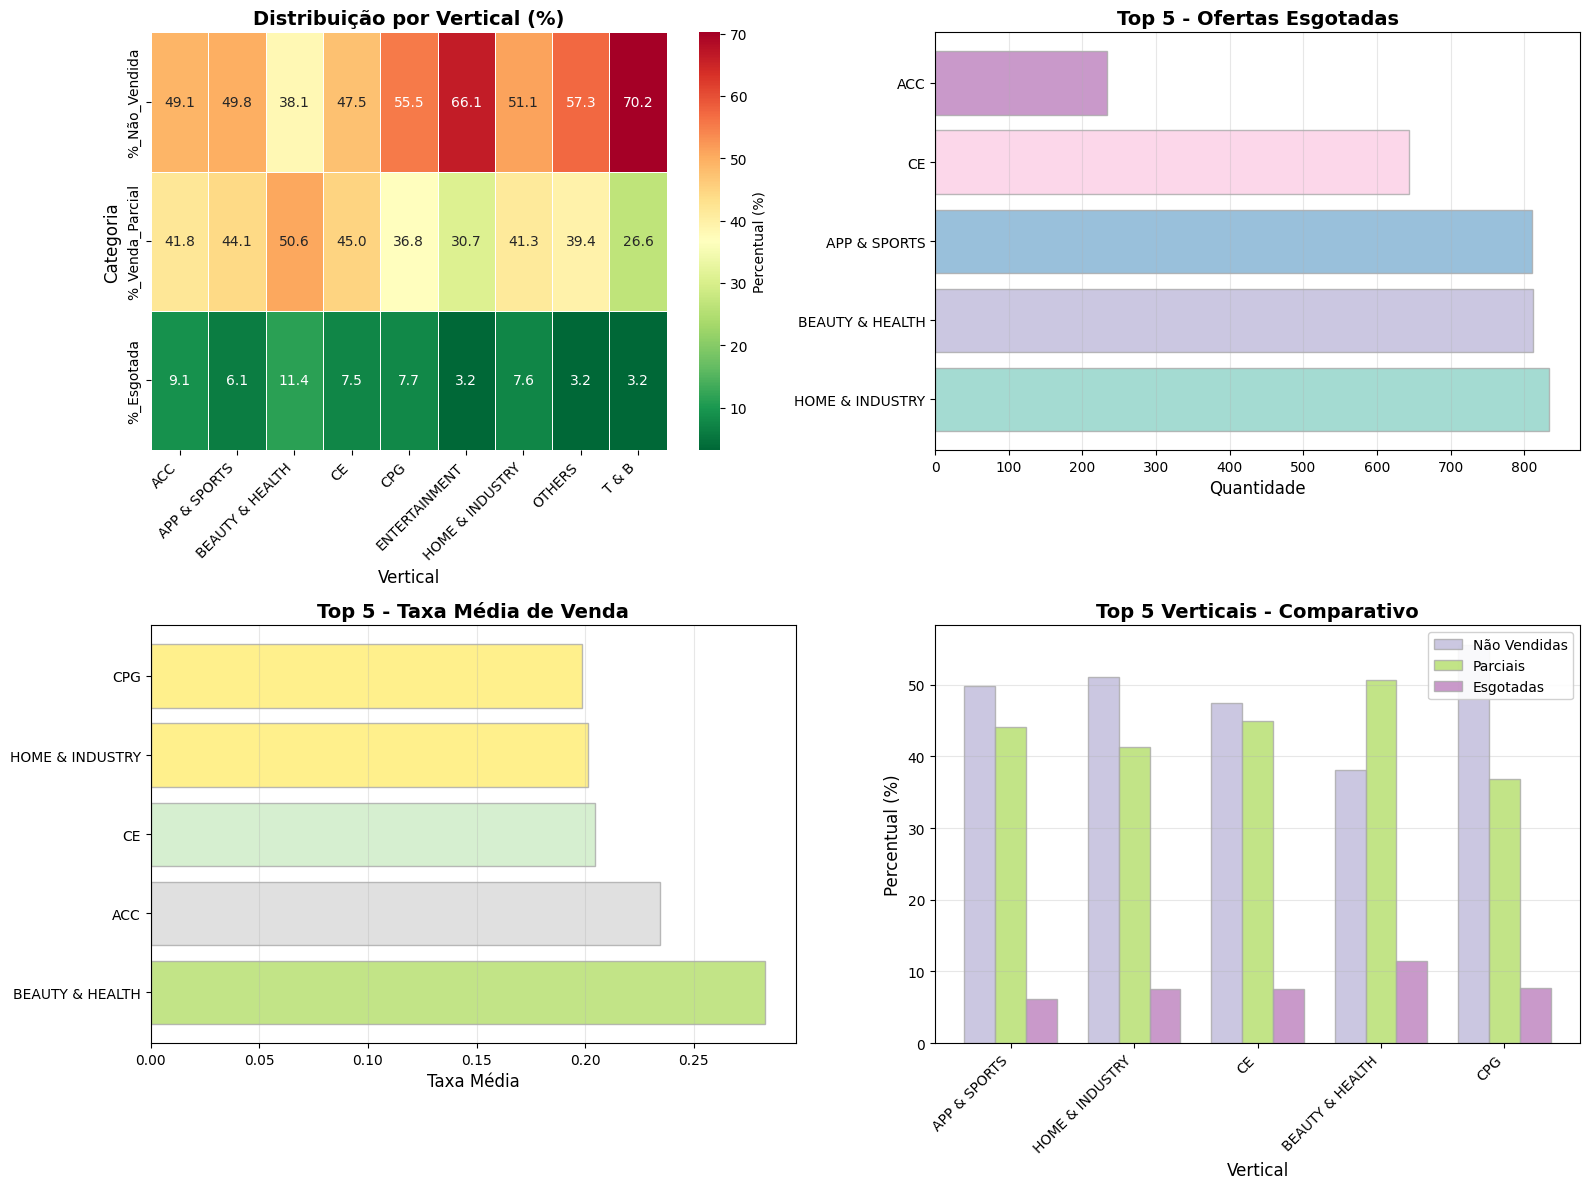


RESUMO ESTATÍSTICO POR VERTICAL

MELHOR PERFORMANCE:
   BEAUTY & HEALTH
   Taxa média: 28.3%
   Esgotadas: 812.0 (11.4%)

PIOR PERFORMANCE:
   T & B
   Taxa média: 10.8%
   Não vendidas: 1,843.0 (70.2%)


In [27]:
_ = analise_completa_por_vertical(df_tratado)

## Quando olhamos nossas ofertas no tempo

ANÁLISE TEMPORAL POR VERTICAL E CATEGORIA

 ESTATÍSTICAS TEMPORAIS:
Período analisado: 2021-06-01 00:00:00 a 2021-07-31 00:00:00
Total de dias: 61
Dias da semana: {'Friday': 7773, 'Saturday': 7506, 'Tuesday': 7322, 'Thursday': 7286, 'Wednesday': 6718, 'Monday': 6307, 'Sunday': 5834}

 PERFORMANCE POR DIA DA SEMANA:
PERFORMANCE_CATEGORY  Esgotada  Não_Vendida  Venda_Parcial  Total  %_Esgotada  \
DIA_SEMANA                                                                      
Friday                     545         3949           3279   7773         7.0   
Monday                     498         2994           2815   6307         7.9   
Saturday                   468         4011           3027   7506         6.2   
Sunday                     380         2983           2471   5834         6.5   
Thursday                   604         3501           3181   7286         8.3   
Tuesday                    605         3611           3106   7322         8.3   
Wednesday                  551     

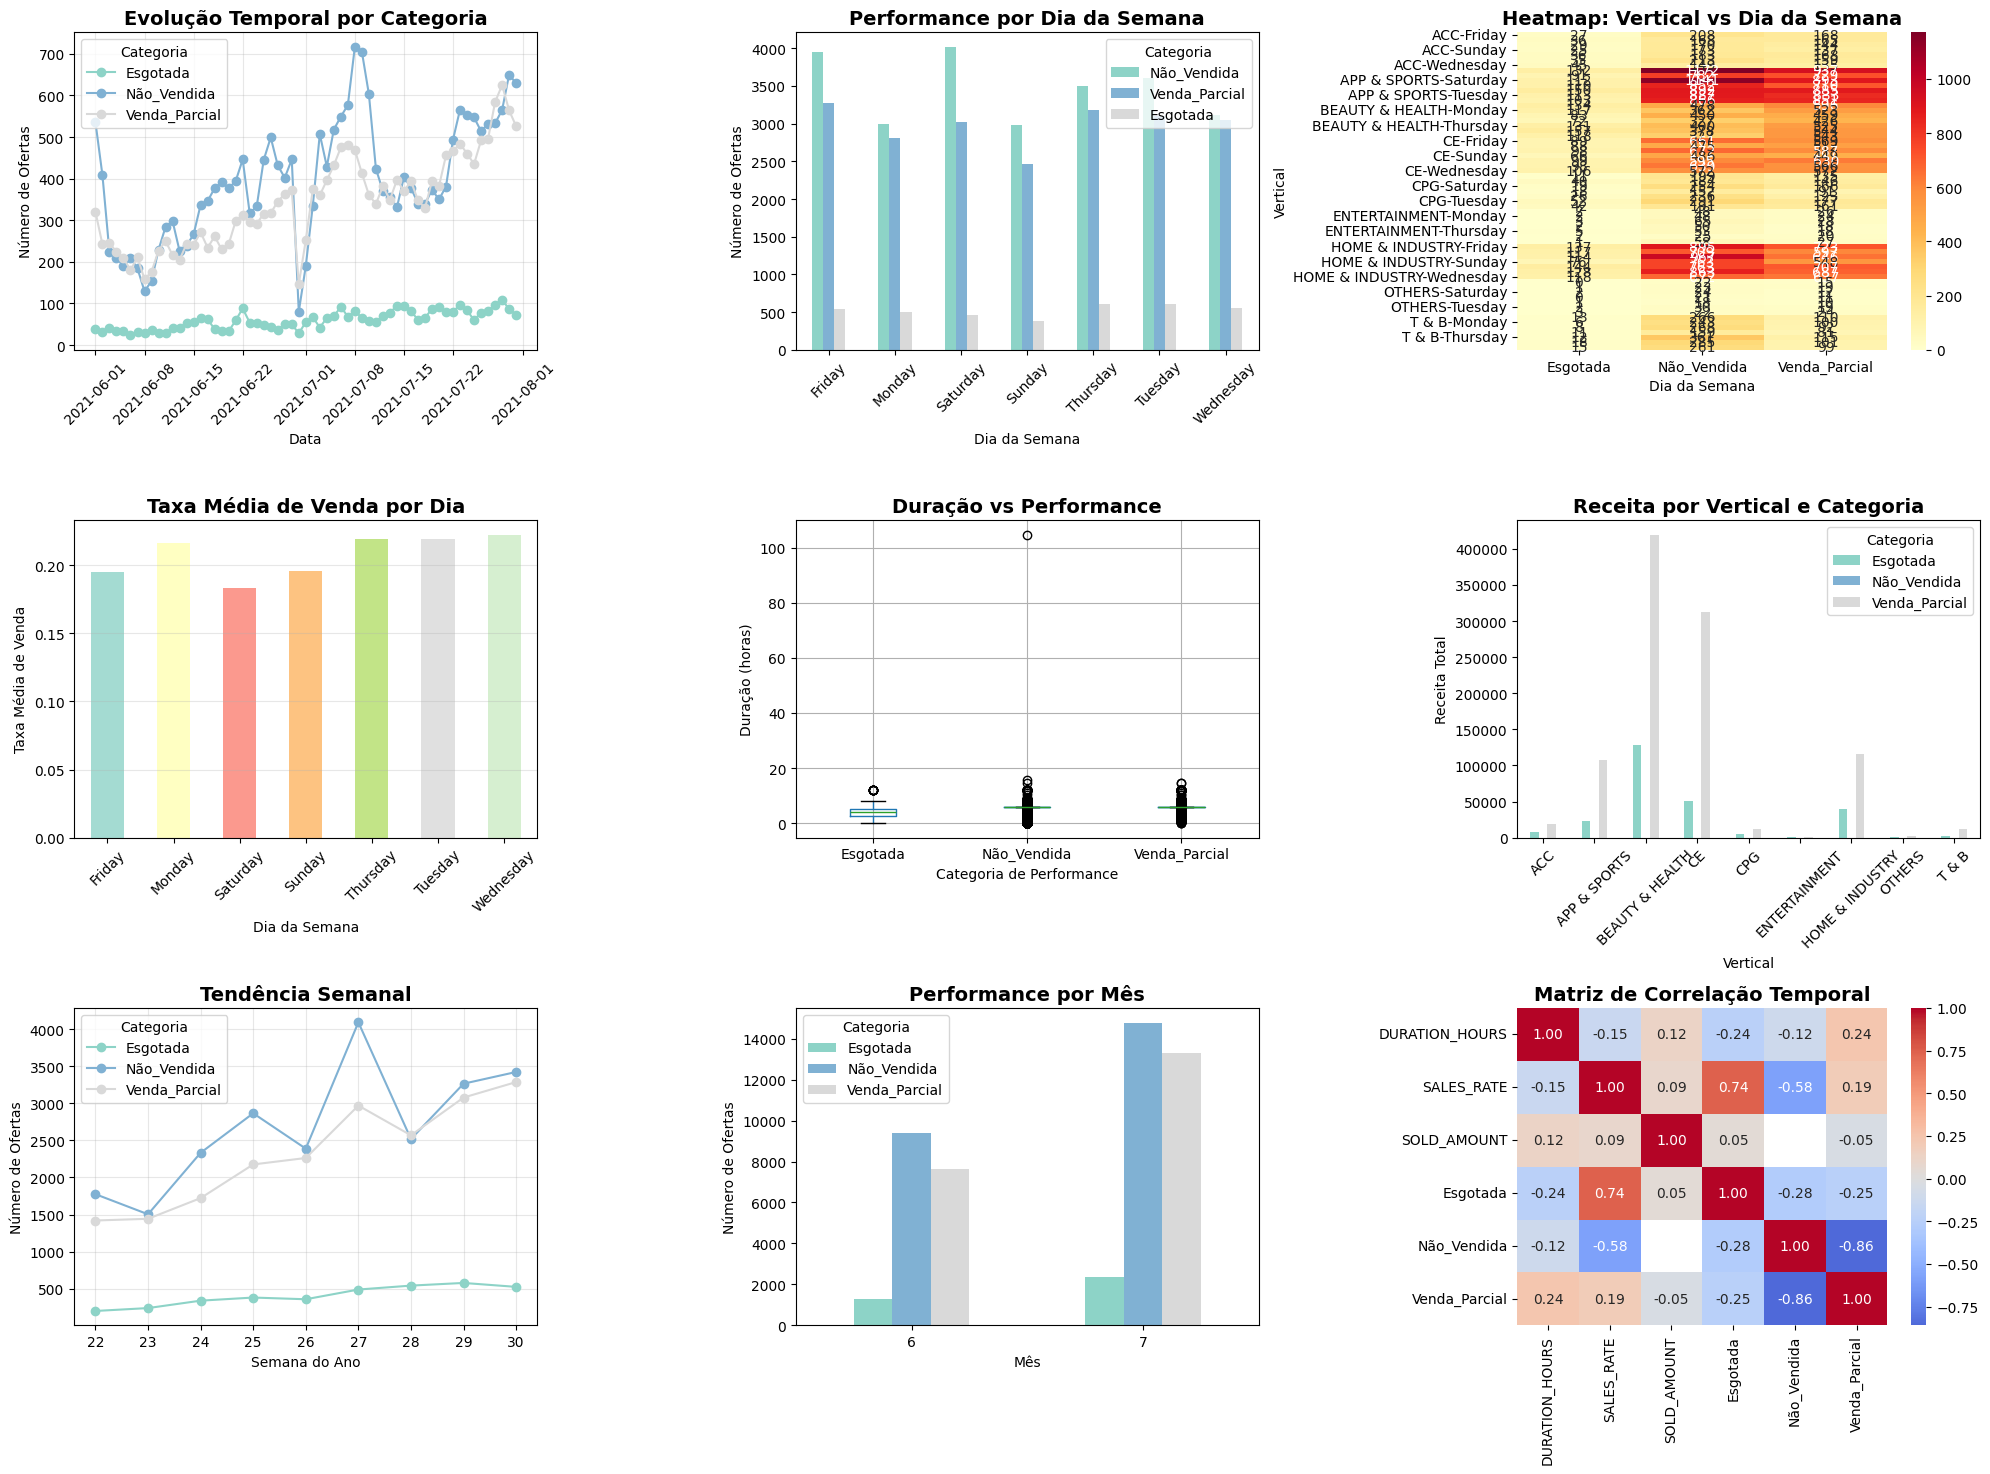


INSIGHTS TEMPORAIS

 MELHOR DIA DA SEMANA (mais esgotadas):
   Thursday: 8.3% esgotadas

 PIOR DIA DA SEMANA (mais não vendidas):
   Saturday: 53.4% não vendidas

 MELHOR VERTICAL TEMPORAL:
   BEAUTY & HEALTH: 28.3% taxa média

 ANÁLISE DE SAZONALIDADE:
   Mês 6: 19.8% taxa média, 1,288 esgotadas
   Mês 7: 21.2% taxa média, 2,363 esgotadas


In [28]:
_ = analise_temporal_por_vertical(df_tratado)

### Analisando por vertical

ANALISE EVOLUTIVA TEMPORAL
Periodo analisado: 2021-06-01 a 2021-07-31
Total de dias: 61
Total de semanas: 9


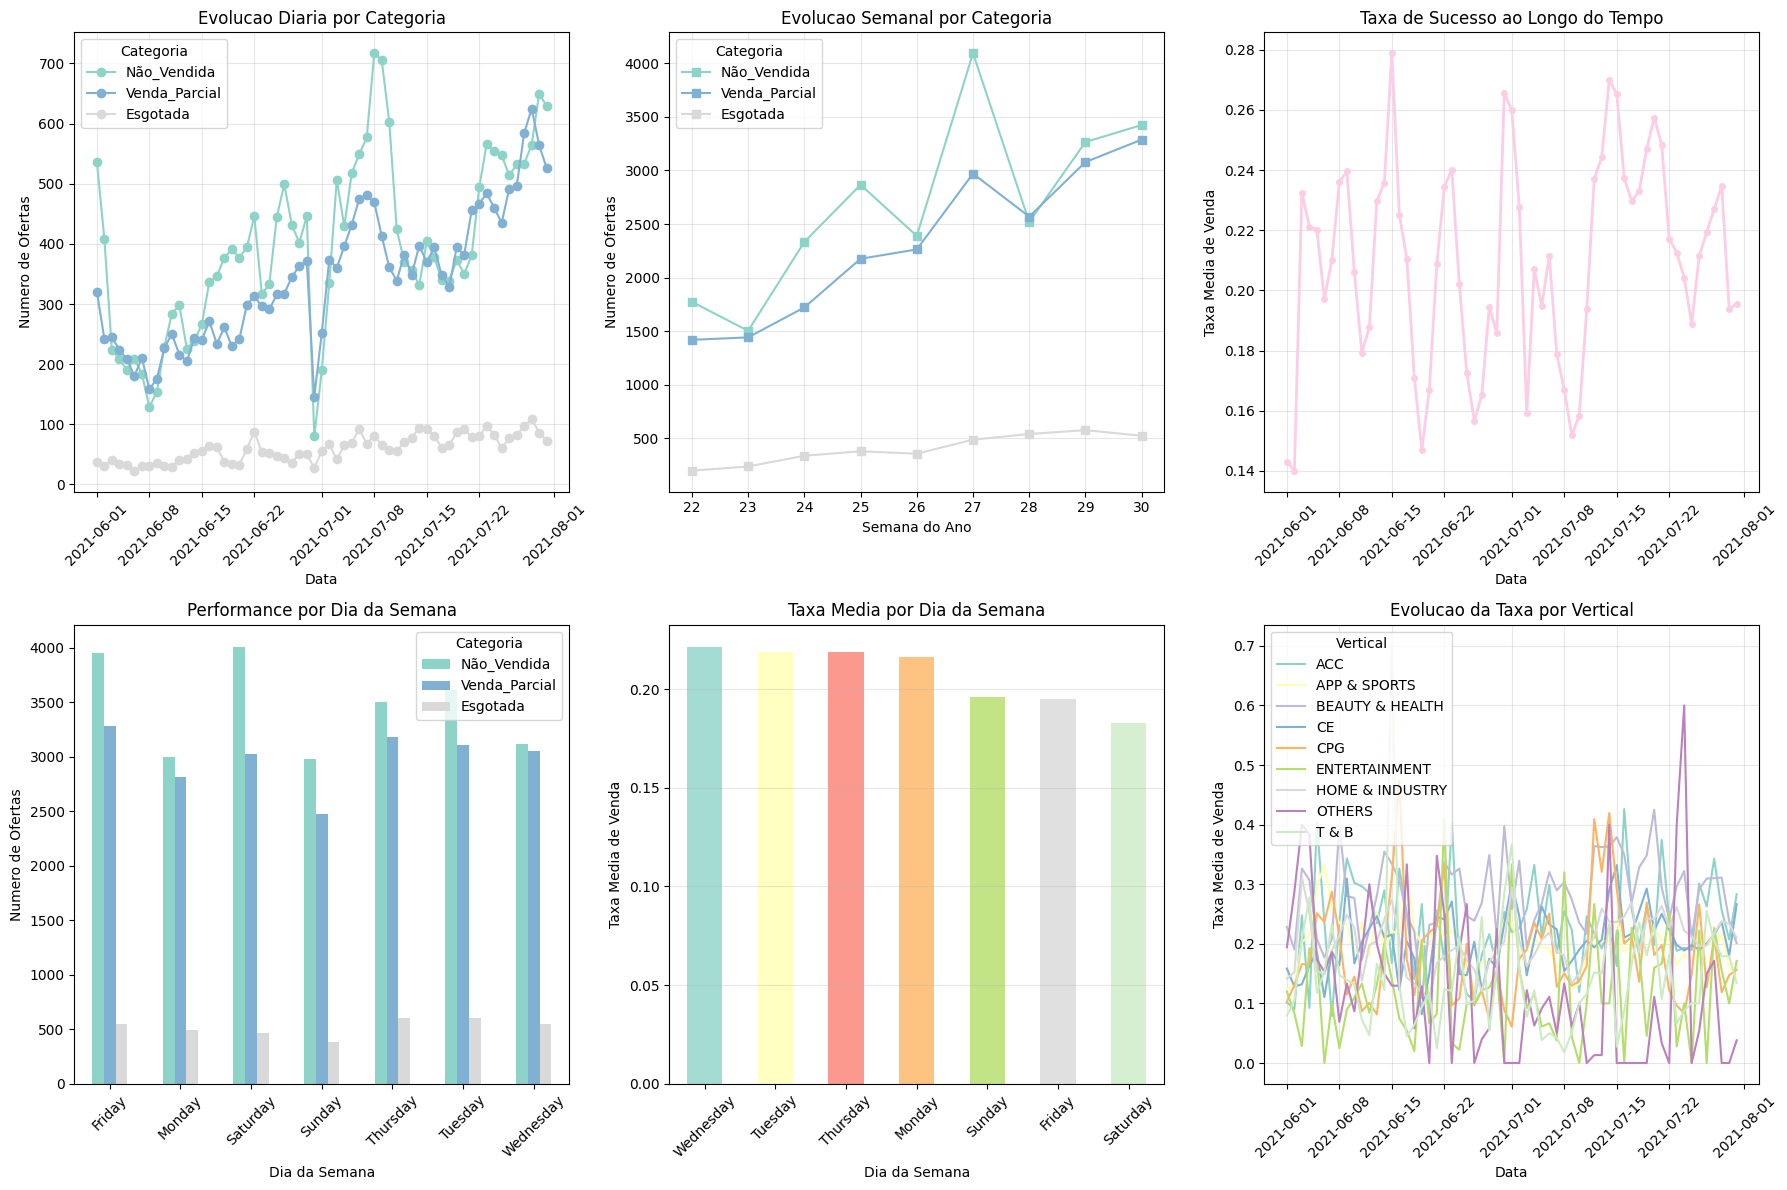


INSIGHTS EVOLUTIVOS

Melhor dia da semana (mais esgotadas):
   Tuesday: 605 esgotadas

Pior dia da semana (mais nao vendidas):
   Saturday: 4,011 nao vendidas

Tendencia temporal:
   Inicio do periodo: 14.3%
   Fim do periodo: 19.5%
   Performance melhorou ao longo do tempo


In [29]:
_ = analise_evolutiva_temporal(df_tratado)

### Análise de correlações

ANALISE DE CORRELACOES E HEATMAPS


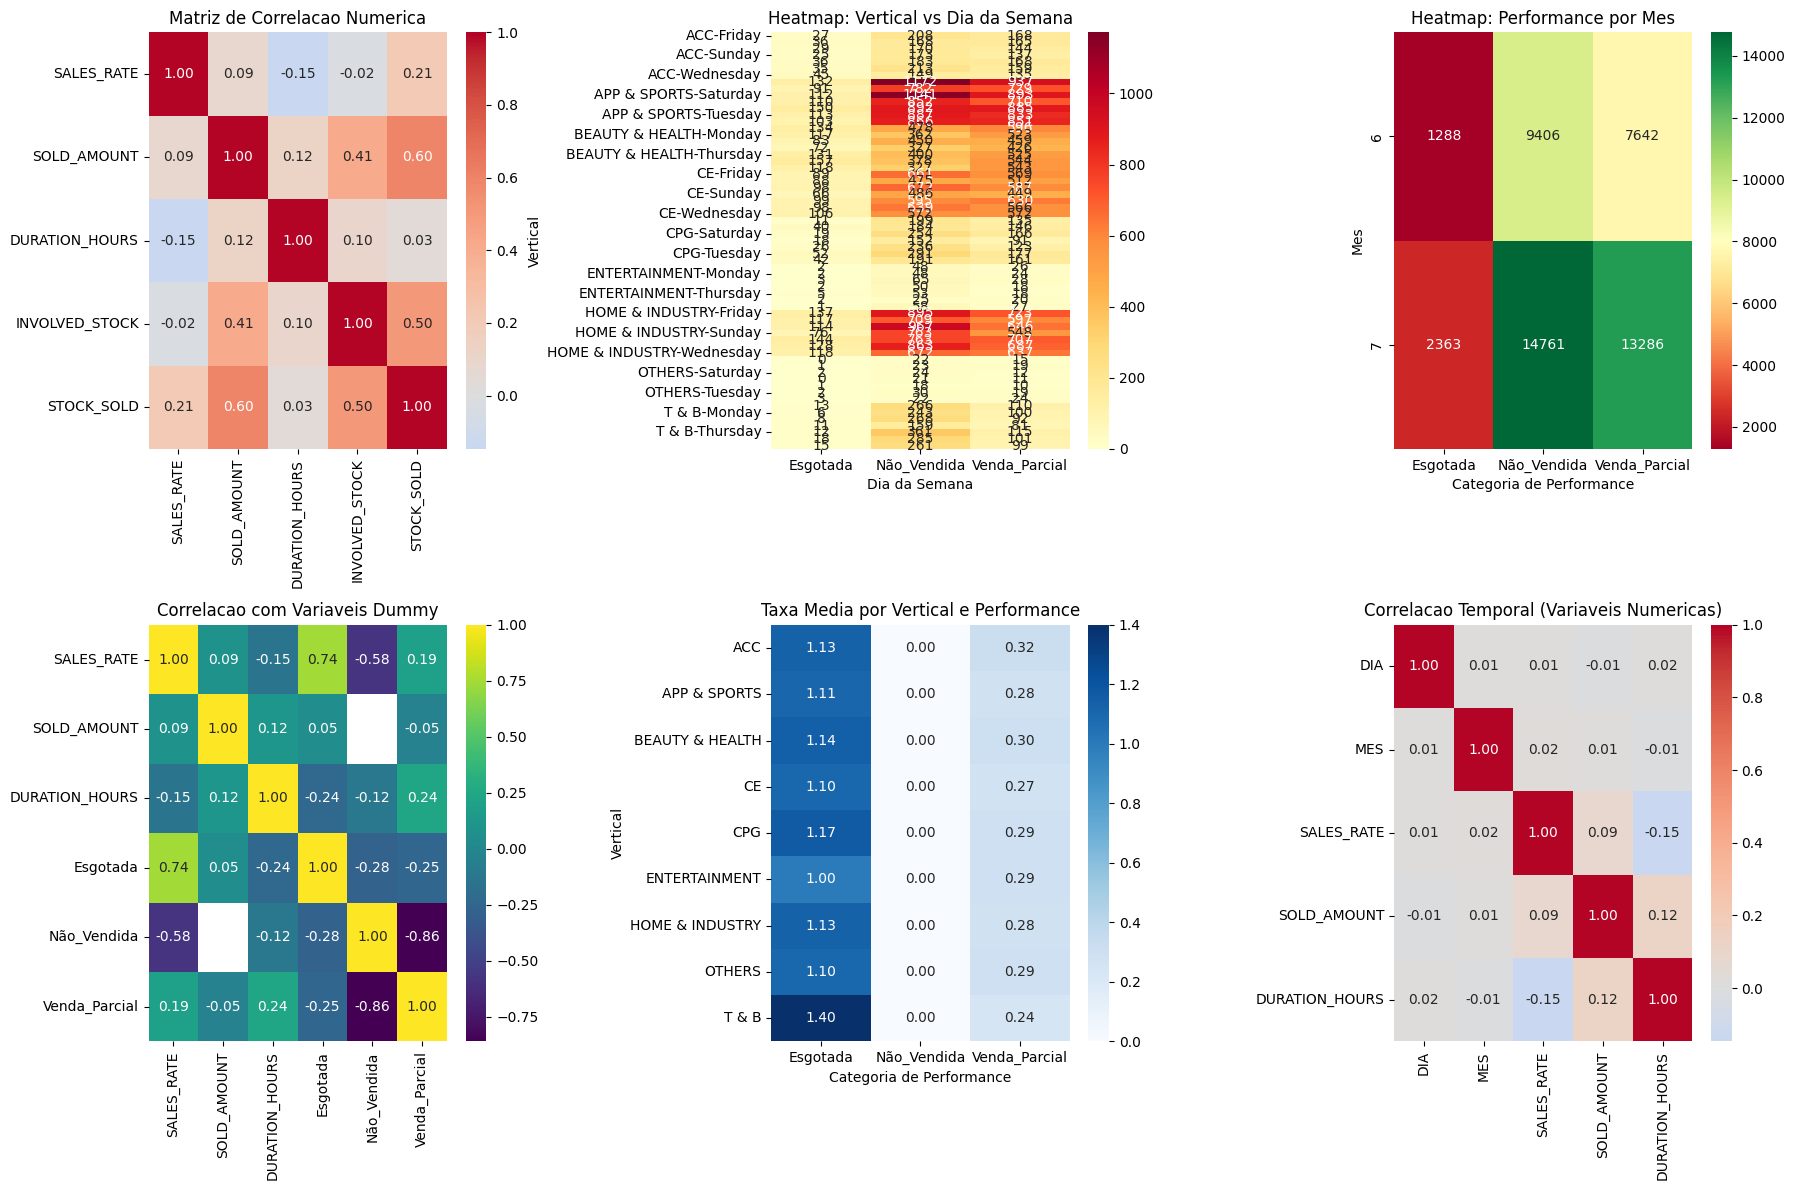


INSIGHTS DE CORRELACAO

Correlacoes mais fortes (|r| > 0.5):
   SOLD_AMOUNT vs STOCK_SOLD: 0.600

Melhor combinacao Vertical + Dia:
   APP & SPORTS + Friday: 2241 ofertas

Top 3 combinacoes Vertical + Dia:
   1. APP & SPORTS + Friday: 2241 ofertas
   2. APP & SPORTS + Saturday: 2146 ofertas
   3. APP & SPORTS + Thursday: 1927 ofertas


In [30]:
_ = analise_correlacoes_heatmaps(df_tratado)

## Análise de duração e receita

ANALISE DE DURACAO E RECEITA
Duracao media das ofertas: 5.7 horas
Duracao mediana das ofertas: 6.0 horas
Receita total: R$ 1,258,663.50
Receita media por oferta: R$ 51.21


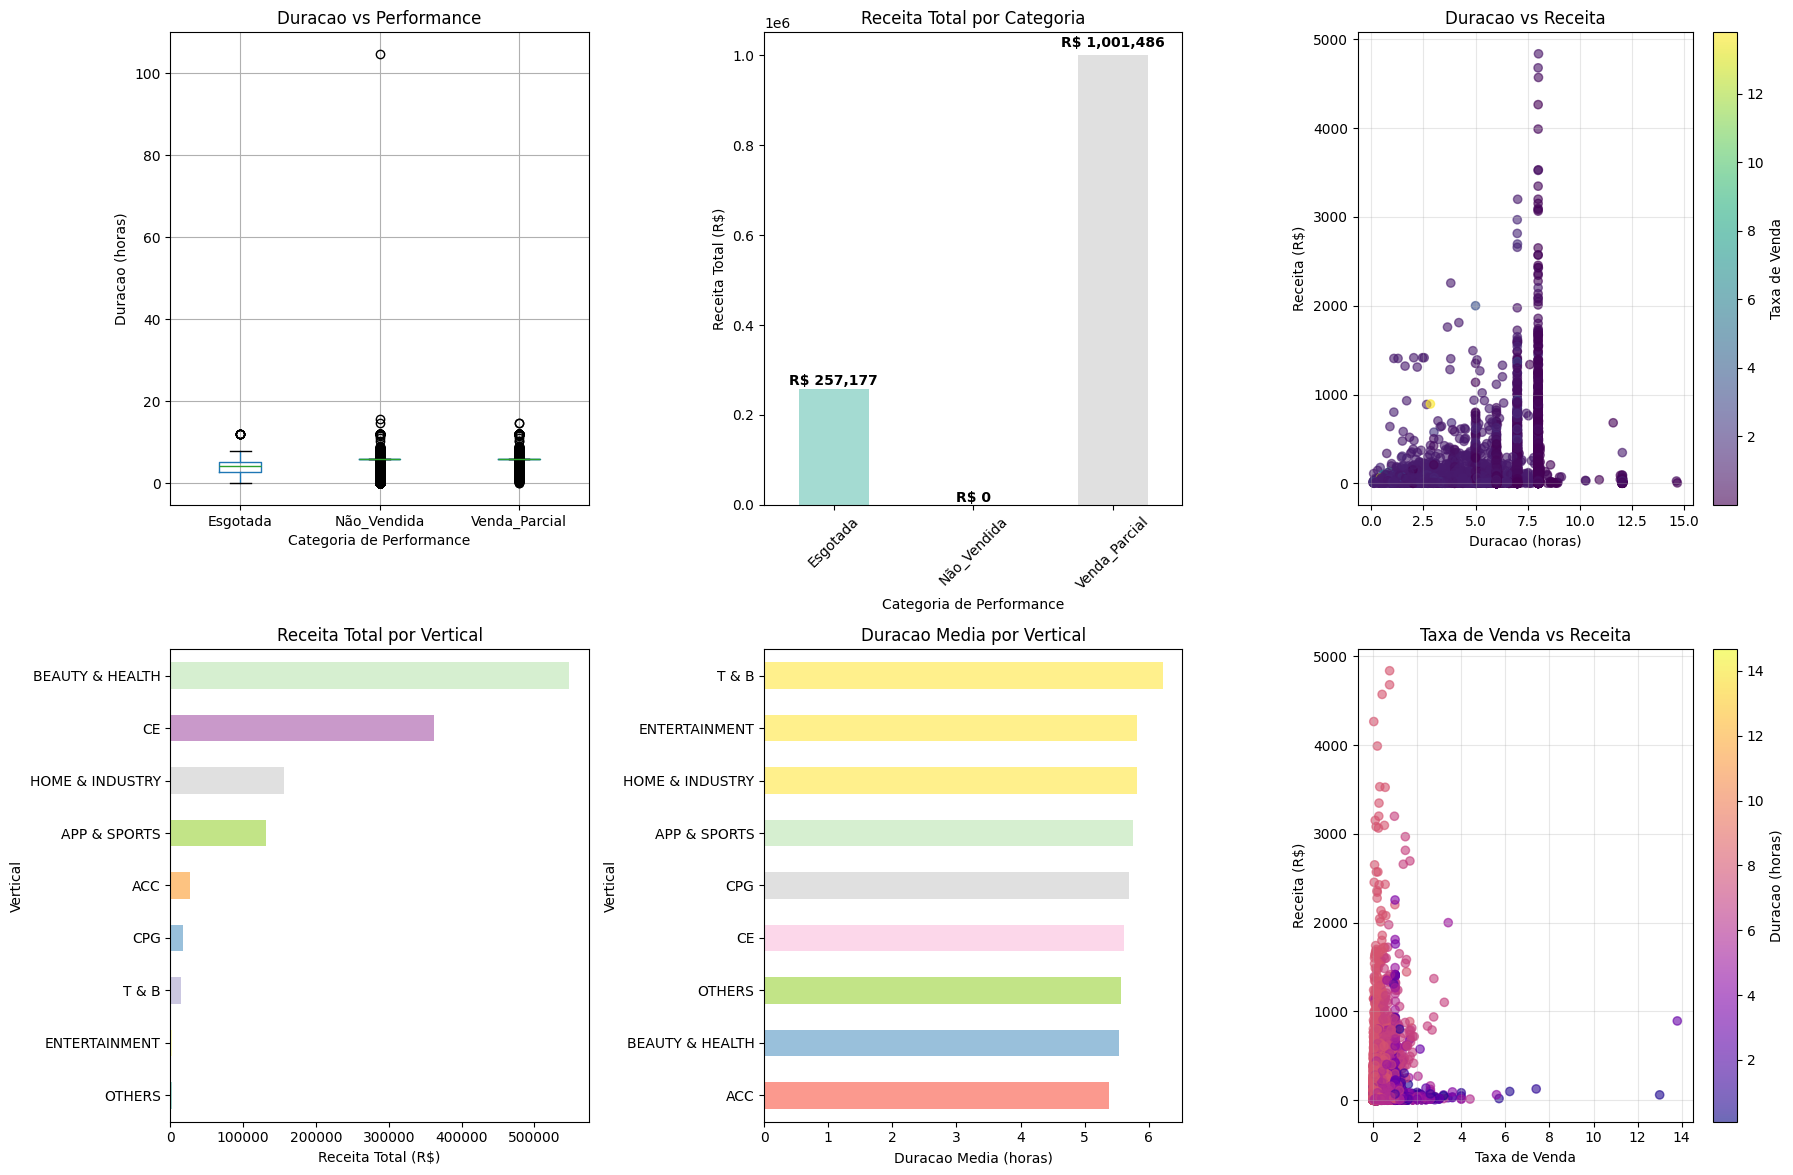


INSIGHTS DE DURACAO E RECEITA

Melhor vertical por receita:
   BEAUTY & HEALTH: R$ 547,427.27

Vertical com maior duracao media:
   T & B: 6.2 horas

Vertical mais eficiente (receita/hora):
   BEAUTY & HEALTH: R$ 21.46/hora

Correlacao duracao vs receita: 0.121
   Duracao e receita tem correlacao fraca


In [31]:
_ = analise_duracao_receita(df_tratado)

## Análise da curva simples até esgotar

In [32]:
_ = analise_tempo_ate_esgotar(df_tratado)


TEMPO ATÉ ESGOTAR (curva simplificada)
- free_shipping: S(t) final ≈ 0.92
- none: S(t) final ≈ 0.86


## Pareto GMV por Vertical

In [33]:
_ = analise_pareto_gmv(df_tratado, nivel='VERTICAL', top_frac=0.1)


PARETO GMV por VERTICAL
       VERTICAL  n_ofertas  n_top  gmv_share_top
             CE       8629    863       0.830369
BEAUTY & HEALTH       7150    715       0.771642
          T & B       2624    263       0.755495
HOME & INDUSTRY      11011   1102       0.665788
  ENTERTAINMENT        525     53       0.657241
            CPG       2714    272       0.633849
   APP & SPORTS      13241   1325       0.612328
            ACC       2573    258       0.583266
         OTHERS        279     28       0.572391


## Pareto GMV por Domínio Agregado

In [34]:
_ = analise_pareto_gmv(df_tratado, nivel='DOM_DOMAIN_AGG1', top_frac=0.1)


PARETO GMV por DOM_DOMAIN_AGG1
             DOM_DOMAIN_AGG1  n_ofertas  n_top  gmv_share_top
                      MOBILE       1841    185       0.872448
                        BABY        801     81       0.861549
                 ELECTRONICS       3018    302       0.818737
         MUSICAL INSTRUMENTS         27      3       0.803407
                    INDUSTRY       1199    120       0.774668
            BEAUTY EQUIPMENT       1099    110       0.757941
              TOYS AND GAMES       1426    143       0.738419
                   COMPUTERS       3770    377       0.714597
                      DRINKS         64      7       0.701373
              WHEELS & TIRES         36      4       0.674639
      TOOLS AND CONSTRUCTION       1491    150       0.661339
          APPAREL ACCESORIES       4387    439       0.648502
                       OTHER         17      2       0.634004
            PERSONAL HYGIENE        840     84       0.632235
BOOKS, MULTIMEDIA & OTHER E!        49

## Comparação de frete com Controle

In [35]:
_ = comparacao_frete_controlada(df_tratado)


FRETE GRÁTIS: COMPARAÇÃO ESTRATIFICADA (VERTICAL x DURATION_BUCKET)
                                gmv_per_stock         sell_through        stockout_rate       
SHIPPING_PAYMENT_TYPE           free_shipping   none free_shipping   none free_shipping   none
VERTICAL        DURATION_BUCKET                                                               
ACC             curta(≤2h)              8.495  2.416         0.045  0.364         0.045  0.325
                longa(>6h)              3.466  0.783         0.118  0.191         0.001  0.003
                media(2–6h)             6.169  1.848         0.365  0.687         0.254  0.484
APP & SPORTS    curta(≤2h)              5.727  2.892         0.050  0.245         0.049  0.181
                longa(>6h)              2.250  0.792         0.106  0.168         0.001  0.002
                media(2–6h)             4.279  1.836         0.352  0.590         0.247  0.445
BEAUTY & HEALTH curta(≤2h)             13.083  2.230         0.173  0.346   

## KPIs

In [ ]:
print("\n" + "="*80)
print("KPIs por VERTICAL")
print("="*80)
kpi_vertical_raw, kpi_vertical = kpi_resumo(df_tratado, group_col='VERTICAL')
print(kpi_vertical.to_string())


KPIs por VERTICAL (formatado)
                 n_ofertas        GMV    ASP  sell_through_%  stockout_rate_%  pct_oversell_%
VERTICAL                                                                                     
BEAUTY & HEALTH       7150  547427.27   3.07            13.7             11.7             4.2
CE                    8629  362787.94  16.62            12.2             10.6             2.1
HOME & INDUSTRY      11011  155518.68   5.73            11.8              8.7             3.1
APP & SPORTS         13241  131101.36   5.11            10.2              7.0             1.6
ACC                   2573   26819.98   5.20            21.0             10.1             3.4
CPG                   2714   16787.68   2.95            15.0              9.0             3.9
T & B                 2624   14302.78   6.09             6.0              3.6             1.4
ENTERTAINMENT          525    1988.57   5.57            11.6              4.0             0.0
OTHERS                 279   

In [ ]:
print("\n" + "="*80)
print("KPIs por DAYPART")
print("="*80)
kpi_daypart_raw, kpi_daypart = kpi_resumo(df_tratado, group_col='DAYPART')
print(kpi_daypart.to_string())


KPIs por DAYPART (formatado)
           n_ofertas        GMV    ASP  sell_through_%  stockout_rate_%  pct_oversell_%
DAYPART                                                                                
tarde          20910  772359.71   5.01            10.7              8.4             2.5
manha          14376  259527.15   4.05            13.3              6.4             2.1
noite          13386  218847.40   4.52            23.7             11.8             3.3
madrugada         74    7929.24  57.46             1.0              0.0             0.0



KPIs 2D: VERTICAL x DAYPART

== KPIs 2D: n_ofertas ==
DAYPART          madrugada   manha   noite   tarde
VERTICAL                                          
ACC                    1.0   849.0   796.0   927.0
APP & SPORTS           3.0  4256.0  3765.0  5217.0
BEAUTY & HEALTH        NaN  2078.0  1802.0  3270.0
CE                    63.0  2436.0  2401.0  3729.0
CPG                    NaN   613.0   789.0  1312.0
ENTERTAINMENT          NaN   136.0   148.0   241.0
HOME & INDUSTRY        7.0  3253.0  3000.0  4751.0
OTHERS                 NaN    69.0    68.0   142.0
T & B                  NaN   686.0   617.0  1321.0

== KPIs 2D: GMV ==
DAYPART          madrugada      manha     noite      tarde
VERTICAL                                                  
ACC                   0.00    6022.05   9852.13   10945.80
APP & SPORTS          0.00   31227.86  41548.68   58324.82
BEAUTY & HEALTH        NaN  124875.96  55112.50  367438.81
CE                 7929.24   55230.80  62340.78  237287.12
CPG       

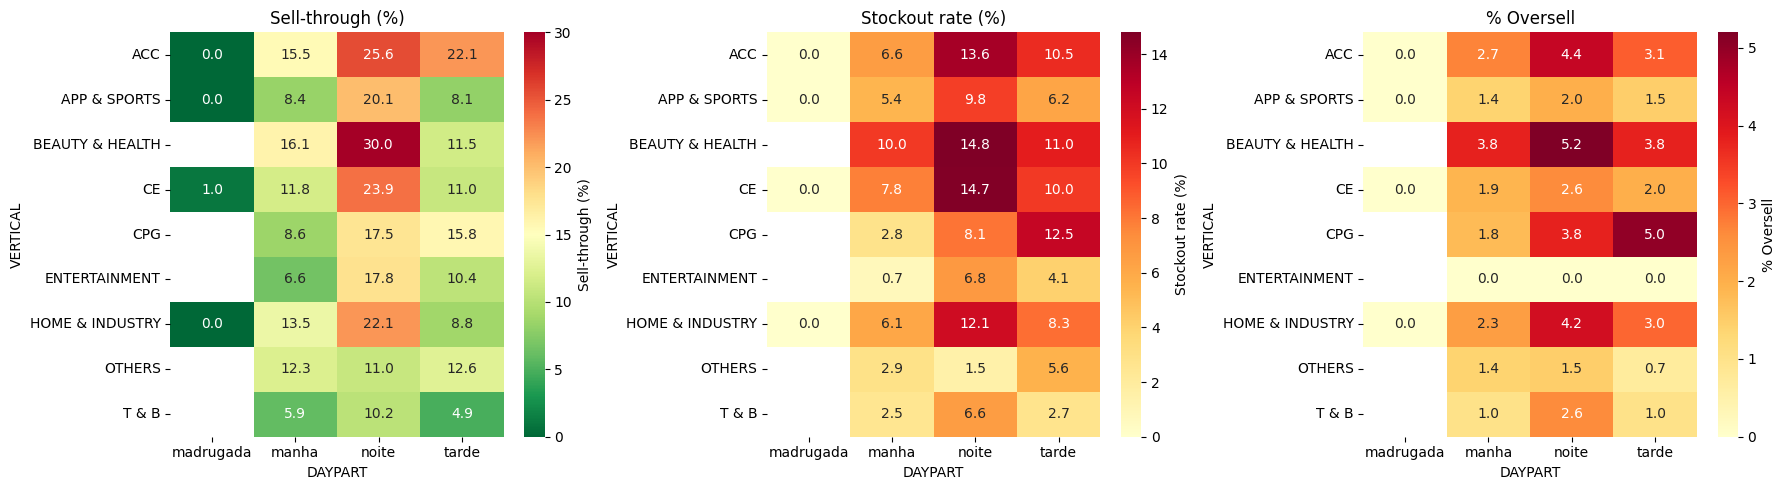

In [38]:
_ = kpi_resumo_2d(df_tratado, rows='VERTICAL', cols='DAYPART')